In [2]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

Welcome to JupyROOT 6.12/06


In [3]:
f = r.TFile("./data/energy_time_60hr_most.root")
f.ls()

TFile**		./data/energy_time_60hr_most.root	
 TFile*		./data/energy_time_60hr_most.root	
  KEY: TCanvas	c1;1	c1


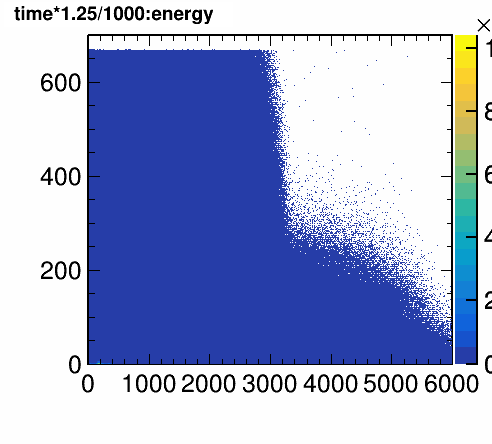

In [4]:
c1 = f.Get("c1")
c1.Draw()

In [5]:
h = c1.GetPrimitive("hist").Clone()
h.SetDirectory(0)
print(h)

<ROOT.TH2F object ("hist") at 0x7fffcd2442a0>


In [6]:
c1.GetListOfPrimitives().Print()

Collection name='TList', class='TList', size=3
 TFrame  X1=0.000000 Y1=0.000000 X2=6000.000000 Y2=700.000000 Width=2 FillColor=10 FillStyle=1001
 TH1.Print Name  = hist, Entries= -2147483648, Total sum= 7.90641e+09
 TPaveText  X1=-1378.378419 Y1=718.037107 X2=2396.469016 Y2=770.945948 Width=2 FillStyle=1001
 Collection name='TList', class='TList', size=1
  Text  X=0.000000 Y=0.000000 Text=time*1.25/1000:energy Font=0 Size=0.000000 Color=0 Align=0


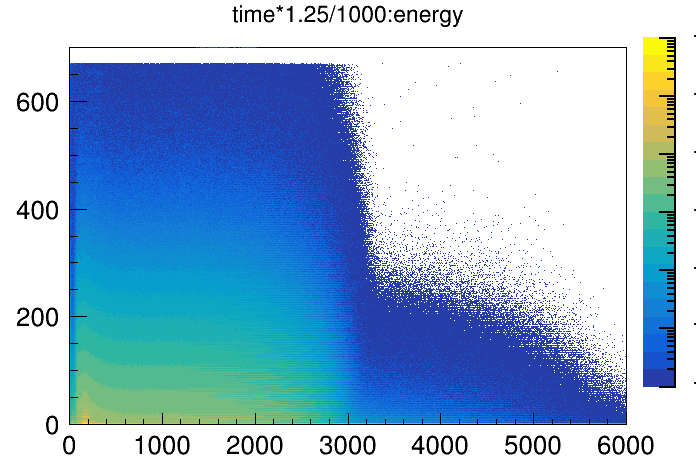

In [7]:
c2 = r.TCanvas()
h.Draw("COLZ")
c2.SetLogz()
c2.Draw()

f = r.TFile("./data/gm2offline_ana.root")
f.cd("farline/calo1")
#f.ls()

c = r.TCanvas()
evt = f.Get("farline").Get("calo1").Get("energy_vs_time").Clone()
for calo in range(2,25):
    evt2 = f.Get("farline").Get("calo"+str(calo)).Get("energy_vs_time").Clone()
    evt.Add(evt2,1)
evt.Draw("colz")
c.SetLogz()
c.Draw()

evt.Reset()
evt.Add(h,1)

In [8]:
evt = h.Clone()

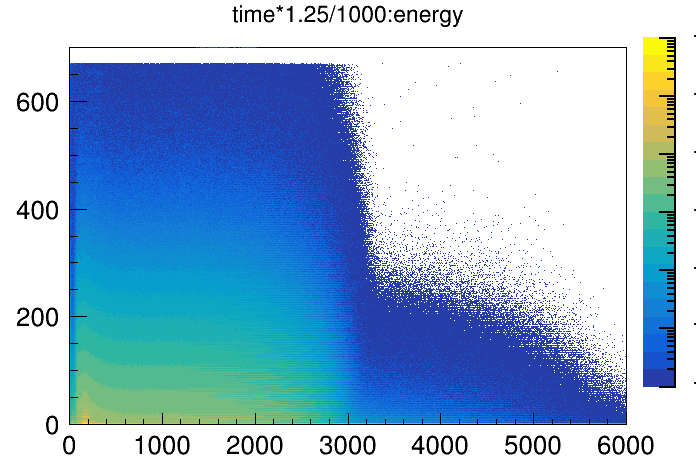

In [9]:
c2 = r.TCanvas()
evt.Draw("COLZ")
c2.SetLogz()
c2.Draw()

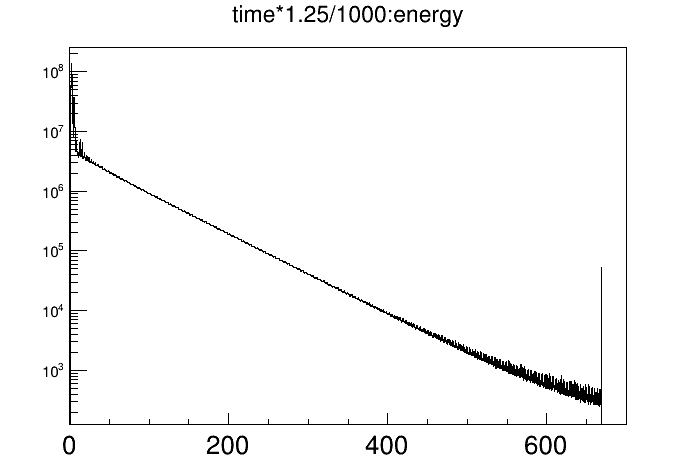

In [10]:
c2 = r.TCanvas()
evt.GetXaxis().SetRangeUser(0,700)
evt_time = evt.ProjectionY().Clone()
evt_time.Draw("COLZ")
c2.SetLogy()
c2.Draw()

In [11]:
timeBinWidth = evt_time.GetBinWidth(100)
timeBinCenters = []
for i in range(evt_time.GetNbinsX()):
    binCenter = evt_time.GetBinCenter(i)
    if(binCenter > 30 and binCenter < 600):
        timeBinCenters.append(binCenter)

In [12]:
timeBinCenters[:10]

[30.010638297872337,
 30.159574468085104,
 30.30851063829787,
 30.457446808510635,
 30.606382978723403,
 30.755319148936167,
 30.904255319148934,
 31.0531914893617,
 31.202127659574465,
 31.351063829787233]

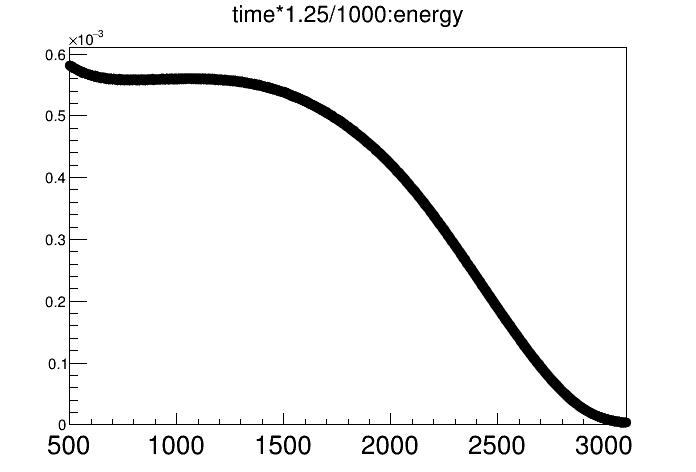

In [13]:
c2 = r.TCanvas()
e1 = 500
e2 = 3100
t1 = 30
t2 = 600
evt.GetXaxis().SetRangeUser(e1,e2)
evt.GetYaxis().SetRangeUser(30,600)

cuti = r.TCutG("cuti")
cuti.SetPoint(0,e1,t1)
cuti.SetPoint(1,e2,t1)
cuti.SetPoint(2,e2,t2)
cuti.SetPoint(3,e1,t2)
cuti.SetPoint(4,e1,t1)

h = evt.ProjectionX("h",0,-1,"[cuti]").Clone()
h.Scale(1/(h.GetEntries()))
h.Draw("HIST")
c2.Draw()

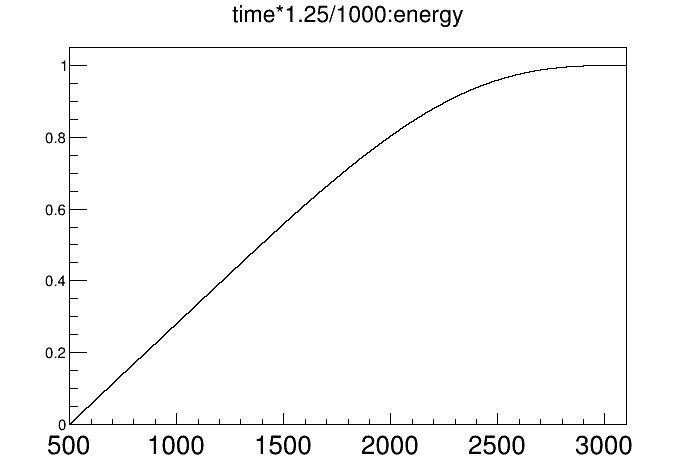

In [14]:
hcum = h.GetCumulative()
c2 = r.TCanvas()
hcum.Draw()
c2.Draw()

In [15]:
ndivs = len(timeBinCenters)
print(ndivs)
timeSlices = []
timeSlicesCum = []
times = []
for div in range(ndivs):
    t1 = timeBinCenters[div] - timeBinWidth
    t2 = timeBinCenters[div] + timeBinWidth
    evt.GetYaxis().SetRangeUser(t1,t2)
    
    cuti = r.TCutG("cuti")
    cuti.SetPoint(0,e1,t1)
    cuti.SetPoint(1,e2,t1)
    cuti.SetPoint(2,e2,t2)
    cuti.SetPoint(3,e1,t2)
    cuti.SetPoint(4,e1,t1)

    htemp = evt.ProjectionX("htemp",0,-1,"[cuti]").Clone()
    htemp.SetTitle("EvT Projection from Time Slice "+str(t1).zfill(3)+" - "+str(t2).zfill(3))
    htemp.Scale(1/(htemp.GetEntries()))
    
    '''
    hprint = htemp.Clone("hprint")
    hprint.Scale(1/(hprint.GetEntries()))
    c = r.TCanvas("c","c",1000,1000)
    hscaled.Draw("HIST")
    hprint.SetLineColor(2)
    hprint.Draw("HIST SAME")
    hscaled.GetXaxis().SetRangeUser(0.0001,0.01)
    c.SetLogy()
    c.Draw()
    c.Print("./images/evt_"+str(div).zfill(5)+".png")
    '''
    
    timeSlices.append(htemp.Clone("h"+str(div+1)))
    timeSlicesCum.append(htemp.GetCumulative().Clone("hcum"+str(div+1)))
    times.append(t1)

3828


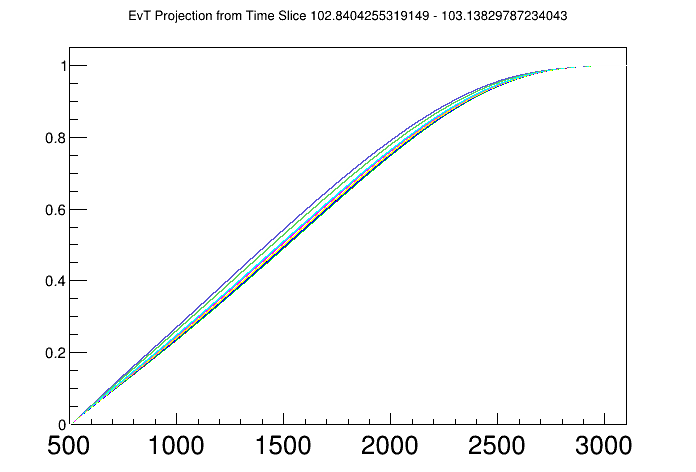

In [16]:
c = r.TCanvas()
timeSlicesCum[490].Draw("SAME")
for i in range(491,500):
    timeSlicesCum[i].SetLineColor(i-489)
    timeSlicesCum[i].Draw("HIST SAME")
c.Draw()

In [17]:
ks = []
for i, hslice in enumerate(timeSlicesCum):
    ksi = hcum.KolmogorovTest(hslice,"M")
    ks.append(ksi)

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::KolmogorovTest>: Errors are zero for both histograms

Error in <TH1D::Kolm

In [22]:
ks[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [28]:
ks = [0.0071572476666567075, 0.001077234135641203, 0.006782675634802948, 0.009444955824065848, 0.017326007612048167, 0.019437761414119514, 0.025083386730007373, 0.027179618494499846, 0.02743110381158831, 0.02733659366735336, 0.02620812534928585, 0.021969986562892285, 0.019740835758163766, 0.0125456854910721, 0.006928359305018061, 0.001356492059800929, 0.0013785558495173489, 0.009420660765994848, 0.013949445664802773, 0.01595776236673707, 0.02084226795200933, 0.022957242691627355, 0.02397862899226494, 0.024306620631081466, 0.02317630478665894, 0.021301772961045184, 0.020210193132969234, 0.015146185050217864, 0.010892683107692092, 0.008660128830437874, 0.0005753001784242762, 0.004904485713187023, 0.010379071787707861, 0.013222727167750081, 0.02003251934543504, 0.023696745882945514, 0.025341427774604353, 0.02758965285789744, 0.027333659182360304, 0.026873037037737746, 0.023166329767974003, 0.01931341169808143, 0.014579381373718836, 0.012061674665140354, 0.0037394483788572574, 0.0018281427001503037, 0.004652045118880677, 0.012227560870272602, 0.016547221992932404, 0.018556538555820512, 0.022654487591111272, 0.024257927343429575, 0.024870795246789312, 0.024903964407766876, 0.022667797530585787, 0.02013048982788418, 0.01855792649029203, 0.012484975583716917, 0.007544826449148778, 0.002004910317068842, 0.0008815566127878816, 0.009217221482027804, 0.014556298564284254, 0.017102300960782968, 0.02308066441030221, 0.026007376402246207, 0.02717086484384118, 0.027621081211517018, 0.02644755898830753, 0.02392389638255088, 0.02230148770472229, 0.01574979881720101, 0.010521167401988718, 0.0077391402419361155, 0.0004677550414082243, 0.00584846741277073, 0.008417955320928816, 0.01508356630940011, 0.018702035651739446, 0.021439143207279354, 0.02253990430949543, 0.0241450551344366, 0.023995180298540975, 0.02361167003367609, 0.020890878956753733, 0.0178231242747679, 0.015970905067535734, 0.009380063541817751, 0.004193904826800654, 0.001387622598838567, 0.0042511923213900404, 0.012493978589307508, 0.017562365077430253, 0.01997749595119319, 0.025144248337785557, 0.027275987900546694, 0.027984269698925035, 0.027962290196979378, 0.02518522293501907, 0.021844736190986203, 0.02000462819158383, 0.012494338229897706, 0.006909407671799761, 0.004123422983910663, 0.004464736286846849, 0.009809543420635947, 0.014341509206836245, 0.016362174532180473, 0.021282656162316504, 0.023249858406174884, 0.023976012355494625, 0.024335762196745547, 0.023290486646268815, 0.022641664383909466, 0.018516536068039824, 0.014661213693886899, 0.010350896224660566, 0.00807699620511676, 0.00017469363674776917, 0.005680693451512231, 0.008380138510934887, 0.016231582939013, 0.02061632051295037, 0.024196930104455117, 0.025744646553165274, 0.02745906026039019, 0.027240791027626166, 0.02686172177364532, 0.02270050328621781, 0.01881992488607348, 0.01672426769544827, 0.008706326494115457, 0.003196393763616523, 0.0023367219900948255, 0.005070193436794379, 0.012324838523736115, 0.01655963989081921, 0.01855631270363184, 0.022398325491753523, 0.024001504907101512, 0.02460379708632915, 0.024040843364357523, 0.0224839002328302, 0.019947703045647747, 0.01835304505558033, 0.01224389899718309, 0.0073820713590397324, 0.004686035606637162, 0.0038126909500071915, 0.009510581210395386, 0.014929692716706966, 0.0174882959024264, 0.023551676237171526, 0.026321788716443917, 0.02744009007390119, 0.027880473376617143, 0.02656228463706345, 0.02554336714744332, 0.0200814817261874, 0.015433892483994516, 0.010064823956231927, 0.007236668737034435, 0.0010822311705118715, 0.006458279185616644, 0.009059067454583625, 0.01567794177816345, 0.019136605419398156, 0.0206208985750182, 0.023432142702248693, 0.024093972650554962, 0.023779342229237554, 0.023344918936327896, 0.02036882585186195, 0.017173604958671762, 0.01529907540320441, 0.00864600401171528, 0.00346537556101012, 0.0007487443991848197, 0.007642338116740588, 0.013031444404643933, 0.017867919935808385, 0.020131773811578324, 0.025238782553066108, 0.02727269101448171, 0.027973278224209974, 0.02708926940975087, 0.024883447435928907, 0.02164799354258501, 0.019823251080889115, 0.012294701522830576, 0.006861082996566459, 0.004114989546014136, 0.004594760686676358, 0.009822344243784586, 0.01220466917400248, 0.01829088287800995, 0.02133966786199204, 0.023500006112181393, 0.024311959270650663, 0.02462051972297341, 0.023620905108841128, 0.022800639274447643, 0.01852809367192998, 0.014628037078210088, 0.01235848709046422, 0.004956418177392841, 0.00051546625455684, 0.006247683655249192, 0.009145601681977034, 0.016736110912468738, 0.02105960416386371, 0.02304900571386931, 0.026970373626111266, 0.02788228745354776, 0.027934303395162785, 0.025488991008709827, 0.022497133166415884, 0.018444287453664165, 0.016177679544399914, 0.008214727238887554, 0.002691643142671618, 6.762183441388903e-05, 0.008088903499692213, 0.012740904101036288, 0.01678347554435483, 0.01860714895285248, 0.022277476354535475, 0.023714063012217623, 0.02413818275816504, 0.023582241115312763, 0.022075522344157772, 0.01953975054196494, 0.01609838039827416, 0.014162716354274296, 0.006873167365353872, 0.0014822086936776002, 0.00415483724886101, 0.009768158876784339, 0.015095757192338077, 0.01973643615534315, 0.021884467272028307, 0.026504825819220645, 0.02796071719645382, 0.02804879106582886, 0.026598824531092413, 0.02388068650481806, 0.0200458823816832, 0.017844458545846265, 0.009984924217807278, 0.004360050875027277, 0.0013990843557476484, 0.006851916395846203, 0.011807212142170231, 0.014194468746520195, 0.019629421294461935, 0.02225346836400033, 0.023855017370017106, 0.024274238962735062, 0.023702776065274767, 0.02241292925760402, 0.021585397214282598, 0.016872572884054526, 0.012790960936647555, 0.007979733120243748, 0.0026988769466703144, 0.0027396198008399764, 0.008175620518932947, 0.010911706456311454, 0.018267415136094145, 0.0223388503667441, 0.025370081179454274, 0.027175918792963882, 0.02783367806703757, 0.027879076672208736, 0.02462576232999497, 0.021235864031051543, 0.016937700952389834, 0.011805582583829632, 0.006359486553409233, 0.0007954790811585677, 0.002040309564186882, 0.009822752163132997, 0.014456838064246025, 0.018266403572881618, 0.02120459216898013, 0.023310506708851986, 0.024383140494775135, 0.024588318865645442, 0.0234849421498175, 0.021436999227547604, 0.018423891345976995, 0.014509922879846426, 0.009841228757440368, 0.004578788090708885, 0.0017865081668723692, 0.00661260146197068, 0.012230751806022067, 0.017248089756674967, 0.02155274490039688, 0.025020950478007342, 0.02651290861756672, 0.028095435458718176, 0.027420397486709547, 0.02546889135854402, 0.02233804098849157, 0.018087487640319866, 0.013070697194545455, 0.01037547125759719, 0.0020831225609704296, 0.003436924908530703, 0.008681596786218326, 0.013352707067660452, 0.017277455619530646, 0.0203748526840678, 0.021685078607810993, 0.023728381251765962, 0.0240615652017806, 0.023456971348428002, 0.021746433073180915, 0.01904387905870253, 0.01556154660398601, 0.013621670291386945, 0.006464985125047729, 0.001089513882661708, 0.0045569149409868115, 0.010177725562184714, 0.015417878173185906, 0.01794515881679526, 0.023818812969600645, 0.026449620350214142, 0.02779353485987468, 0.027807902004219343, 0.026386227239452442, 0.023719482663179192, 0.02214319749251259, 0.015203176113010364, 0.009713123212918284, 0.0039741113129567185, 0.0015856222472303005, 0.006996111710168507, 0.011937209269479332, 0.014234567032583634, 0.019741151307677507, 0.022358989413280683, 0.024015657355435205, 0.024463040831088967, 0.023904876156268073, 0.022516253168837597, 0.021536560777364433, 0.016634311315587125, 0.012469452137029935, 0.007551245907187809, 0.0022712409060339223, 0.0031552827104417425, 0.00590343166706464, 0.014094717731685524, 0.018932797839274207, 0.022943307493940523, 0.025840414509014642, 0.027510638783996677, 0.02784665510162465, 0.027683232771759603, 0.024426106043170304, 0.020904388246997974, 0.016398807513975155, 0.011227048352176638, 0.005731856631094601, 0.00015202587500895426, 0.0026238175342025993, 0.010266604529336087, 0.01467730967469566, 0.01828114839813494, 0.021237522172413537, 0.023298652405708442, 0.024017838262106572, 0.0240848199596444, 0.02305637600940985, 0.021091330573399014, 0.01808010722624931, 0.014217319677786722, 0.009617847344103703, 0.007130032716973267, 0.0010666611948328408, 0.00687350743126619, 0.012412238716796531, 0.017449971792901586, 0.02179633761226013, 0.025202798507097224, 0.026653357421590806, 0.028266190894166543, 0.02758569639123709, 0.02549090433640644, 0.022284381634979866, 0.01802106336996545, 0.012988167421111085, 0.010409083828159249, 0.0016446308120086073, 0.003981039608915715, 0.009037765509048501, 0.013699542097226458, 0.01754998808539926, 0.01924417273578871, 0.022902089510875634, 0.02396223245832313, 0.02408864379831721, 0.023188245177326094, 0.021404875171794846, 0.018704228859803163, 0.017106304789915983, 0.010693930188453882, 0.0057341357232365, 0.0003647956319405288, 0.005130193473286582, 0.010638567530655674, 0.01589402559975911, 0.01844222669277512, 0.024080192916546228, 0.026552655560906913, 0.027784196870410893, 0.027744978906435847, 0.026077157132282647, 0.023149047804879253, 0.021501834390679375, 0.014803275823456585, 0.00951126324539081, 0.0038197914494353946, 0.0017999811642084307, 0.007181115628342005, 0.00988709213635619, 0.016324786036012007, 0.019784933833888685, 0.0222643151861196, 0.023782450197376737, 0.024513312636198825, 0.02413927876445171, 0.02358825770926226, 0.019866880943387066, 0.016480373529365544, 0.012229092087125304, 0.007314129680443093, 0.0020513748075263183, 0.0035577882819892714, 0.0064160738129391826, 0.01475097021806926, 0.0196052102106421, 0.023372676783992796, 0.02612519585831735, 0.02784365773798142, 0.028067916340921373, 0.02773144445874609, 0.024178976585385814, 0.020496179431923, 0.015909387981353496, 0.010702359108813841, 0.005257431008884261, 0.002515221279424551, 0.005845332649614565, 0.010652968255281614, 0.01496708335282293, 0.018652176670937215, 0.02134000884646514, 0.023088193055423867, 0.023778459255406892, 0.023856968601529693, 0.02286935843276694, 0.020803973211268034, 0.017613538110181404, 0.013674799885320665, 0.009134665996495817, 0.006610089534367425, 0.0015137404586877956, 0.00729722332493038, 0.012839810972662735, 0.0177761541790466, 0.021978658602863188, 0.02525992355038531, 0.026653031649079673, 0.02812753435489651, 0.02761206164463187, 0.02544790484264242, 0.02198857492617856, 0.01772869735453836, 0.015452626368987699, 0.00704989413599727, 0.0014859930745931837, 0.003964280698364353, 0.009314912619325433, 0.014122790030673571, 0.01804866563234575, 0.019835981601183827, 0.023183312337134665, 0.024283315654581694, 0.024210113283925083, 0.023188858811608593, 0.02123865044104306, 0.018486810154057676, 0.01701540888497649, 0.010257197853169364, 0.005204190257264318, 0.0002430490333861779, 0.005791962769881365, 0.011310949264456804, 0.01641623109427609, 0.018801182210471112, 0.024414297910426874, 0.026836168384354986, 0.027935670579084526, 0.0275823525401514, 0.025891086858516987, 0.024693493104277986, 0.018973645744451317, 0.014250761304143544, 0.009063242532205085, 0.0034382721501786118, 0.002212985321883576, 0.007530749450145369, 0.010085737496355274, 0.016555876463692776, 0.019955945819460086, 0.022446242540176464, 0.023976872943896943, 0.024366500239357325, 0.023855140049063084, 0.023528259321024036, 0.01977741569111824, 0.016336258475457444, 0.012114563923827926, 0.0071788557133166675, 0.0017556618611953012, 0.0010905819251812443, 0.009649815178108367, 0.015082239713670065, 0.01972887106367449, 0.023487593032231913, 0.026267747538080144, 0.027998031786925892, 0.02854855910488524, 0.026724720636678023, 0.024166822696511547, 0.02044492233875911, 0.01563283068388832, 0.010213331358796929, 0.004743246350563168, 0.0020307592710377964, 0.0062556516581240285, 0.011238541054225892, 0.015524651372467446, 0.018934655613414675, 0.02153925807568885, 0.023320073815573772, 0.023959615486947805, 0.02379514563780033, 0.022563774019399407, 0.020318123093406082, 0.017101015518830476, 0.013197367440880348, 0.01106768927130225, 0.003155554011920192, 0.002190645479023645, 0.007581749882213107, 0.012843940633997852, 0.01785421073361082, 0.022188920025567216, 0.02412154953303558, 0.027401232293981725, 0.02795937741789628, 0.02715238710971446, 0.025169015315109233, 0.021837519564866348, 0.017408370789418426, 0.015034127089537164, 0.00687347963408963, 0.0012875334213316436, 0.004318483543353568, 0.009643636443411041, 0.014264703407460222, 0.018122228752886216, 0.019860834645620162, 0.02343425766826318, 0.02436609002872442, 0.024277742032151495, 0.02329244244406664, 0.021198566074095537, 0.01985773717353917, 0.014503633393007753, 0.009964647987533659, 0.00472492553035031, 0.0007271861155281889, 0.006400301141899767, 0.011880822621593512, 0.014431167891738983, 0.021336871692822168, 0.02469388267053041, 0.026935328606588815, 0.027945476195780528, 0.027564168450733062, 0.025661172853611025, 0.024337331752140368, 0.018684296625820773, 0.013674958867545772, 0.008252405000687468, 0.0027666402695639136, 0.0027913395705173594, 0.007969261663532012, 0.010338299569808085, 0.01672407061683001, 0.019904527844175013, 0.022325143241883172, 0.02379903095396141, 0.024142811525809327, 0.024030904469167336, 0.022007262086611634, 0.019578264353209363, 0.016028113705882974, 0.011550943555275806, 0.006669079743684914, 0.0013908817184049016, 0.0013055662030652115, 0.00990124332811948, 0.015200448276775524, 0.019974491151039164, 0.0237869328083955, 0.02660026968785667, 0.028110308475626733, 0.02843066421449869, 0.026630300933284057, 0.02392595268306913, 0.02026638870911729, 0.015462343200581485, 0.009921510137862577, 0.007174877935040402, 0.0011476277799761236, 0.006500887329443816, 0.01145836617087359, 0.015857992725961556, 0.01938843107993482, 0.022000142765501662, 0.023043223687870595, 0.024248508896862198, 0.023913930431515795, 0.022302541717421354, 0.019879423963663156, 0.016707796573692424, 0.01268378892619132, 0.010507237986459805, 0.0028006661006040323, 0.0026137830297724984, 0.008243691199549041, 0.013582721817370136, 0.018467756384299483, 0.022569659880117887, 0.024416095325158815, 0.02749307001415252, 0.027970852660787082, 0.027077966809612664, 0.024831493699873974, 0.021344967449729246, 0.016974132372735873, 0.011938368957850776, 0.006403781475853965, 0.0035879060179183075, 0.004603007884109167, 0.009689909249375961, 0.011998821550295802, 0.018376577024849017, 0.01978176903100065, 0.02329136369072282, 0.02371154631300476, 0.024244594599261815, 0.02313957319368959, 0.021999334018245775, 0.0178825766923576, 0.016020992807630363, 0.009655766737746208, 0.007098290234613003, 0.001006774866104565, 0.006723843760805426, 0.009427892246338165, 0.017257928915371645, 0.019299419240282056, 0.024862554113981916, 0.025965430428618153, 0.02822262658994923, 0.027538947513400358, 0.026510663551967906, 0.02258385451983458, 0.020353484112985376, 0.013299434972313173, 0.010573538635384072, 0.0023366582800940505, 0.0032237222663777376, 0.005847366413941124, 0.013073787455303243, 0.015058876800580712, 0.020184441589926494, 0.021229792335631992, 0.02361700284718682, 0.023870268305416165, 0.023491063665438627, 0.021769023849959157, 0.020336237013426572, 0.015482924937979703, 0.011261037204023605, 0.008792230042695082, 0.0009656241980496305, 0.0018103487460016665, 0.010147310553727806, 0.012843290484495451, 0.02044353650424363, 0.024132988931080734, 0.025294607064440255, 0.027869292072923935, 0.02783678860648342, 0.026741826315980988, 0.025217199100423804, 0.020002957919652398, 0.015213598379956783, 0.01248653578616965, 0.004052518804389393, 0.0012952421453779617, 0.006847230045687436, 0.009374535753147173, 0.016198321964721374, 0.01965891406189213, 0.020851692199070904, 0.02376620512124994, 0.023955561024255168, 0.023804940198518754, 0.022965140336751566, 0.019908999120962168, 0.016675243589419686, 0.014515882464954721, 0.007663307756379745, 0.0050601113474598725, 0.0031640479622174755, 0.005978790124262778, 0.014367801818545467, 0.019062529396221994, 0.020927027937347242, 0.025985563134147793, 0.02670135893310649, 0.028027317598583956, 0.027395374137915485, 0.02463986491973147, 0.021005149700854542, 0.0186637788005799, 0.01131029623946539, 0.008478481598117094, 0.0003462749664973619, 0.004848572998156331, 0.0074519525269595155, 0.01476655908326524, 0.01645513286380773, 0.021048676471825623, 0.02190922173667098, 0.024030246469858463, 0.024003246524469224, 0.023494275884026472, 0.020902286650221646, 0.019418711830707203, 0.014022315980397881, 0.011694747210183265, 0.004387827882400497, 0.0013359426211533298, 0.0040634727722915764, 0.012488057896588023, 0.015026340526846815, 0.02213685743050703, 0.023574726226479437, 0.027324190517520053, 0.02813192675747095, 0.027742215691663352, 0.02565667122632065, 0.02382675940380008, 0.017867313796799178, 0.015302886326192311, 0.007435559982951867, 0.0016715750994521494, 0.0011606185964717075, 0.0090352494487132, 0.011287923076026107, 0.01754989120786765, 0.019022128391453563, 0.022695530926235385, 0.02376454773689951, 0.02371748076764063, 0.022969634046390464, 0.022134050500604685, 0.018761673879139018, 0.016941014834018664, 0.011006718232796253, 0.005968901585729602, 0.0031948892034209253, 0.0052560340179506615, 0.007992726573815168, 0.016041477332134346, 0.018227842355568347, 0.02429029941869415, 0.026852771717516655, 0.02730064330248222, 0.027818544521182986, 0.026871131232478584, 0.02336380080485012, 0.019540931300255193, 0.017139783261791164, 0.009583221905691885, 0.006692482154068702, 0.0016962464998250826, 0.004484555598814943, 0.012208181758548098, 0.016327962782101635, 0.018028383155113792, 0.02228098731449385, 0.022990436255041935, 0.024579093971650534, 0.02414273316563187, 0.022301709665462743, 0.01988245896484192, 0.01807220476840815, 0.012151470882144744, 0.009678145356205814, 0.001893301367687672, 0.0008341690960280701, 0.009272982423650211, 0.014651780304829554, 0.01693845840230923, 0.023382514806424948, 0.02463983311631207, 0.027765172148704997, 0.027858805041076684, 0.026915551388535575, 0.024316376962843056, 0.022363901050400925, 0.015958062861099187, 0.013294833085801427, 0.005330214937439237, 0.0024922786943374353, 0.00558763119288358, 0.01048237485259551, 0.012689015981270424, 0.018498357620759076, 0.019759093694449392, 0.022942779572335925, 0.023397165949172016, 0.024058793151106317, 0.02301240037129959, 0.021758048559998633, 0.017761018836512543, 0.01577795213498201, 0.009030969151766377, 0.003745542812669145, 0.0010599985705360138, 0.007384326404406671, 0.010041492010953557, 0.017864787925899406, 0.019955431598601137, 0.025635960175888817, 0.027672039138024296, 0.027771678165678437, 0.027348939869241085, 0.02633301109922026, 0.022133880849906085, 0.019923081417024202, 0.012917887218462987, 0.007355533705080131, 0.004384670436293425, 0.003847904026495985, 0.006519545052715847, 0.01396466597816065, 0.01577064892865815, 0.02047474673962052, 0.022690216200245694, 0.023165239161445472, 0.023995776243387335, 0.023439238445308264, 0.021109259242532263, 0.019736587894742808, 0.014706032673349023, 0.01006833152939951, 0.007584714845458862, 0.0003172112230294677, 0.0030485709850275877, 0.011378369874690153, 0.0138876951016913, 0.021038769336221064, 0.024450449981255007, 0.02539714920592223, 0.027662990620415995, 0.02762064990215035, 0.02621953075990774, 0.02466061091049765, 0.019220556472450967, 0.014345668026262137, 0.011618749672608897, 0.0034284645117179657, 0.0005289495956394275, 0.007594552296422807, 0.010044038555654666, 0.016516724473134514, 0.01968963436112814, 0.020845705545477156, 0.02379125723064135, 0.02399810033191896, 0.023896183338490973, 0.02218624375513123, 0.020952919167082307, 0.016345582149211113, 0.014042490999392476, 0.006825855985724771, 0.0041781307877512, 0.003834266447169943, 0.009442350098658847, 0.01208102365221203, 0.019691409425869943, 0.021649877552526398, 0.02658245216607541, 0.02725444778160191, 0.0282193872250861, 0.026723264691371262, 0.025269266138179924, 0.020341425226522325, 0.018036956846436858, 0.010699821534702003, 0.007851137070153669, 0.0006497781221714849, 0.006222707646808212, 0.008572545399722353, 0.015312462204688237, 0.01695105953585213, 0.02142604751525018, 0.02229482507484748, 0.023940553497919403, 0.02357867669965752, 0.023013305224317715, 0.02055878520073634, 0.018883095705514996, 0.013380357114029684, 0.011101460659819928, 0.003613130456017244, 0.002172087638872666, 0.00494087656697767, 0.013292670074412871, 0.015659453674398194, 0.022471037180025022, 0.023967738466952326, 0.027545733567876596, 0.028127678291495428, 0.02756425839325438, 0.025008125412954108, 0.023365257097039016, 0.017688675338890403, 0.012445118912081055, 0.009520313849756323, 0.0009101746454069914, 0.0018526902527623013, 0.009566440354973338, 0.011928215227153871, 0.018349367053167254, 0.021071969856154005, 0.02200390048217521, 0.024059267438964638, 0.024066462935576627, 0.02328120582515497, 0.022167804952122838, 0.01831407675984925, 0.01459593067137721, 0.012196024472179934, 0.004859419622090355, 0.0021586310196937686, 0.006136163995895838, 0.008773816443418403, 0.01656569253697998, 0.02106755548411554, 0.0226748933027367, 0.02684002001469732, 0.027072187817339555, 0.027128157505161232, 0.02625490347560283, 0.02293805621544509, 0.018891671511789887, 0.016431816681502898, 0.008636763597046793, 0.005858408980017826, 0.0025680732517869287, 0.005085637308788693, 0.01242252373290903, 0.016618187088935144, 0.01822102299872036, 0.022383900673191293, 0.02301136662254366, 0.024287010533135645, 0.023770585514302556, 0.021912548752147654, 0.01954576505905581, 0.01772593496858821, 0.011477340146672954, 0.009154029276991438, 0.001417791814877556, 0.001429927449869084, 0.010020932753286138, 0.015224123485806651, 0.017557245483377504, 0.02401905210970734, 0.02516871164301343, 0.027981015574057133, 0.028136700107012802, 0.027318140677902614, 0.02411419055768449, 0.02203954541539127, 0.015496214976072398, 0.012684599961319043, 0.004485332969860922, 0.0009960721617600643, 0.003808805744582644, 0.011524484392435141, 0.013680159595987784, 0.019261028932460456, 0.02042839735040991, 0.02332070001218506, 0.024154211695154637, 0.023830808242996104, 0.022293008676562587, 0.021066628419562028, 0.01679464221164295, 0.01475814163023248, 0.008148600581748655, 0.0029156487289704325, 0.0002471667942072764, 0.008150213086129343, 0.010735116502268383, 0.018230053362138066, 0.020226666196418663, 0.02560765247861624, 0.027500673885818172, 0.027716654842975252, 0.02730673947035428, 0.02595966957804119, 0.021259065351202644, 0.019249781161382706, 0.012337846417061593, 0.006467047198794262, 0.0035586973752821938, 0.004821476662536905, 0.00738749804578509, 0.014542030600503963, 0.016234248461750977, 0.021126141147302102, 0.02328307348298997, 0.023645035904020617, 0.024165634228906552, 0.02348479235699208, 0.02115758509124882, 0.019725731508085098, 0.014483497683391966, 0.009591992466637556, 0.007040516582383138, 0.0010858605708414237, 0.0038824799345439365, 0.012273388543224906, 0.017309831736322834, 0.019356948842457755, 0.025030233644202815, 0.026008199461235282, 0.028003533296527494, 0.02766113816283694, 0.02565709363467611, 0.022536642137481966, 0.020354440116808925, 0.013430279283163982, 0.010681554787747127, 0.0024300791595694426, 0.00035272473602177, 0.008135006102779618, 0.012585463858827584, 0.01460699305703167, 0.020187211825961726, 0.021283506213039982, 0.02366317124722772, 0.02373684898101408, 0.023443995696680986, 0.021950813860521057, 0.02031915762080977, 0.015186654180657289, 0.013275213178682244, 0.006357007089517308, 0.0036103232325342405, 0.00488736158976083, 0.01047988564603608, 0.012902546251136071, 0.020109168642369557, 0.021896430658111532, 0.026740879890685965, 0.027347715317829757, 0.028027889291548813, 0.026488750468133204, 0.02521496720360128, 0.020413523782275178, 0.017690126922655536, 0.009708727203052714, 0.0068722916230707365, 0.001500189857096601, 0.006794409080179642, 0.009148612094706354, 0.0161013959723747, 0.01767438170223329, 0.021842263744711155, 0.02356944527918281, 0.023737584263035905, 0.02361401160463139, 0.02272598657462177, 0.019747358875820742, 0.018213793312801152, 0.012584519838412689, 0.0077187874115871025, 0.005223458791279778, 0.0026631515497819724, 0.0055642114803892695, 0.014173709144861824, 0.016457168240792464, 0.023050097362726563, 0.026329238408708322, 0.026896009297373402, 0.027944083617508608, 0.027252127439801377, 0.024574680696952234, 0.02284384927686567, 0.016958834243331333, 0.011714693995935166, 0.008914182428846062, 0.0005531788773663893, 0.0022821196192703286, 0.010005146263470543, 0.012237841546599681, 0.018483818848625266, 0.021367660639972974, 0.02227003485693907, 0.024227147787171166, 0.023993244858111773, 0.022941911644192514, 0.02172205105994146, 0.017680097627421065, 0.01382204239560808, 0.011490762211334049, 0.004084102245487553, 0.001571658614575533, 0.006669497338430974, 0.009524791657104459, 0.017770644853721485, 0.02186847182873014, 0.023601443556436674, 0.02786472761502823, 0.028096940768416512, 0.027690373229436904, 0.026480716430198392, 0.022494993167993027, 0.018364009033818463, 0.015624884177808496, 0.007626486367902807, 0.004784390242716319, 0.0035435204393466924, 0.00845595436308011, 0.010912568524909072, 0.01744689342329242, 0.01895573895122843, 0.02258158724420606, 0.02309633461848054, 0.02418911663253287, 0.023193737039401474, 0.0223099894800029, 0.018428184653609236, 0.016580769408227003, 0.010535853256340655, 0.008130081215381169, 0.0005989039825008424, 0.005083647915940959, 0.007794562327527121, 0.01591784238198879, 0.01807469434418213, 0.024106168421089258, 0.025289110378921842, 0.02781194985085006, 0.027980647853062757, 0.027068315354623673, 0.023785015621631322, 0.021553395840686107, 0.01474192689647097, 0.012090573813601402, 0.0038984721326403293, 0.0017148745679159694, 0.004475889931159105, 0.011978376615110697, 0.014030212417945886, 0.019771194868504482, 0.020960407619424137, 0.02370753850014884, 0.024111608511559413, 0.023872356163743336, 0.0223190998582371, 0.021045785626513713, 0.016333071684007605, 0.014184225263350558, 0.007053254618735294, 0.0017896331900651985, 0.0009364927042564419, 0.009371816917293108, 0.01205402018825108, 0.019602802868789904, 0.021374045816595577, 0.02639504223022532, 0.028213672451576022, 0.028011982925394918, 0.02660960354783881, 0.025222077084607886, 0.020495367827870037, 0.016094633059000274, 0.013446185545681555, 0.005360605484196201, 0.0026099706351279117, 0.005291181499706976, 0.007836140344385234, 0.014902583189445262, 0.018587660306503995, 0.020074512581097603, 0.023395196018970554, 0.023835902370771656, 0.02431784975043444, 0.023525897991293454, 0.020649575499619488, 0.017519232774157678, 0.015332920765440461, 0.008848990127331868, 0.00628842206263458, 0.00156219131550428, 0.004535001896221025, 0.01302699186053069, 0.017785763070249927, 0.019883423165201197, 0.02546337736930393, 0.02653306954667728, 0.02845344750526213, 0.027773852938923038, 0.025185052760417215, 0.02209419797711848, 0.01993296945588513, 0.012806606991864422, 0.009974647103009604, 0.001643968960283626, 0.0012339963597059467, 0.009334466172617129, 0.013835680238963033, 0.015606872381823844, 0.020616869234989732, 0.021452687274207682, 0.023736293656410112, 0.023839043631842805, 0.022914783583402487, 0.020904086158013924, 0.019709655881114674, 0.015138458002723565, 0.012818754745662353, 0.0052883652978129025, 6.691898205268831e-05, 0.002794125576119688, 0.011227102048628756, 0.013636127804804554, 0.020688370609283746, 0.022430591853243087, 0.026900829931886694, 0.027950869266120115, 0.027696513442080073, 0.02620682937905172, 0.024605501427413357, 0.019124740552776354, 0.016759251819984278, 0.008866078860598536, 0.003067725480613126, 0.000362941550433149, 0.0076761319541342465, 0.010151639463762185, 0.016762320206136494, 0.01824184620021263, 0.022289873112287084, 0.023946300839125745, 0.024201520357126693, 0.023827392353162447, 0.022992807768025925, 0.019775550755028626, 0.017860845613796583, 0.01185233776905259, 0.00706009515048972, 0.004431488602013034, 0.0038228403841852887, 0.006437477725694252, 0.014743082100265537, 0.017164826748433115, 0.023751996003879228, 0.026442950141076005, 0.02702745083512098, 0.027823550506446082, 0.027305750930629036, 0.024420270535840893, 0.02235670357357844, 0.015879383246848178, 0.010734015708457612, 0.007975508821543409, 0.0006472309421104439, 0.003233487728786788, 0.01078357680856129, 0.012947001917775036, 0.018951554567412543, 0.021772990175088047, 0.022504382732915162, 0.0240676341097682, 0.023747200781085553, 0.02241032110732244, 0.020664554614953923, 0.01911256309567516, 0.013447974995130452, 0.011003420207697179, 0.0036991330135418, 0.0008477110459730874, 0.0076489046211388745, 0.013158603189878437, 0.015623791201656911, 0.022584394454854884, 0.024108225138420536, 0.027596997686278768, 0.02783543063701316, 0.027658044103687718, 0.0255308635779235, 0.023489707418078487, 0.01731152959376714, 0.01478351566983993, 0.006953625100525163, 0.004265681127810894, 0.004421317634294986, 0.009931967340302439, 0.01212323105187696, 0.01803311092024268, 0.019391694700437057, 0.02312709808399349, 0.02354408850143247, 0.024074980902912324, 0.023187415778865517, 0.022180387184398964, 0.018457388242861417, 0.01636448949844016, 0.009759082073448444, 0.007113587554660072, 0.0008043268050830776, 0.006247824512253086, 0.009013989213594253, 0.017048713281920036, 0.01905883080338061, 0.024732447620450515, 0.025922624394273897, 0.028206219562679713, 0.027387437188753028, 0.026603974804808805, 0.023038471591777798, 0.02089803775638166, 0.013995996654859566, 0.008746712481663255, 0.005780152230262625, 0.002611692240746699, 0.005196675331867628, 0.012671815836718336, 0.014671976472430015, 0.01983534752266708, 0.02220934996846674, 0.022890490373247308, 0.02423916830057199, 0.023745132814573466, 0.021703196555253934, 0.02042493553700503, 0.01565140475565696, 0.011227271089813307, 0.008696117812870385, 0.0010262950802387705, 0.001758042665168158, 0.009969612986114207, 0.012540202456405025, 0.020149650028434773, 0.02418629132552541, 0.02514717105212816, 0.027678990511940837, 0.027707095203761634, 0.02658187432673481, 0.025039610496569942, 0.019892508319914126, 0.015274389777069408, 0.012428276525887072, 0.004134112503360821, 0.0012848251113349862, 0.006679957132475767, 0.009056347487705618, 0.015685987408698643, 0.019142402217753596, 0.02029265280497089, 0.02360137156108949, 0.023557986440765066, 0.023010987147548734, 0.022482251863509273, 0.019838802374595954, 0.01665407850345213, 0.014679411674787868, 0.008212324021432627, 0.005639997893600535, 0.00276145823820223, 0.005574109410657391, 0.013635566385646392, 0.01836936839318598, 0.020376720692328543, 0.025805364792447327, 0.02670243048193488, 0.027958470828994164, 0.02681581415816775, 0.025602215161946107, 0.021181073471406853, 0.01897411436355656, 0.011859738629330485, 0.008886301115288542, 0.000643502590000844, 0.004569205990603287, 0.007198326488941975, 0.014559451647658372, 0.016221010438767614, 0.02086287169330553, 0.02209986105680689, 0.024632945628071556, 0.024440163207252674, 0.02381566973620991, 0.021384432888402027, 0.019803999661548888, 0.014451874885313631, 0.012028041891103958, 0.00426808103935733, 0.001068400289433169, 0.003794626258276257, 0.011724552935519106, 0.014476365853479889, 0.021709333082000903, 0.023347985598388687, 0.02744657983351595, 0.028248388241308986, 0.02774864259635279, 0.02566024691539842, 0.02402050943511519, 0.018640052441629307, 0.016173992500648937, 0.008316760160250958, 0.002361087499789749, 0.000361080283314108, 0.008181194746218534, 0.010651632765485752, 0.01696268947766988, 0.0182578057830306, 0.022084405974632515, 0.023688617266324874, 0.023884455100157076, 0.02376805927886877, 0.022642912657602654, 0.019054244798280384, 0.01555399424525633, 0.013305528232462671, 0.00617375686255589, 0.0035413560039821435, 0.004812339680981159, 0.007614305516271902, 0.0161176326410975, 0.020955343093431444, 0.022685992206766814, 0.027004491090111937, 0.027303682849925792, 0.027862145730480015, 0.027327866148917745, 0.024219493851219687, 0.01987102269967861, 0.017351799795222833, 0.010090439721541666, 0.007198987216068153, 0.0012614659424681207, 0.0038890314802744186, 0.011793092917819548, 0.016346244944392463, 0.017818189138744167, 0.021881181760878943, 0.02262265520714213, 0.023773649165682698, 0.023779889678201716, 0.02255691302100915, 0.019623363209712308, 0.018171533396285078, 0.012774426659947047, 0.01026963795603758, 0.0024148364969295844, 0.0001686852669645078, 0.008671295588811079, 0.014316099026440932, 0.016505070928281684, 0.022860240939978016, 0.024291813154742492, 0.027741517841712082, 0.027855159597146906, 0.027204703509799588, 0.024937523867389233, 0.023143797481612716, 0.017106716900807895, 0.014345661615155547, 0.0062424133506612245, 0.003196074993182474, 0.005171224674764663, 0.009894282419187495, 0.012371794278725257, 0.01853609549468549, 0.020092605159546917, 0.02371288959010681, 0.024419396004420946, 0.023918659805195364, 0.02223229630835355, 0.020517719474403395, 0.018848302765260616, 0.013731265411575266, 0.009596795481890408, 0.004600650803852024, 0.0009400077545416163, 0.003960732118891197, 0.012729717079814462, 0.017711510490430404, 0.022034041435594287, 0.02365117780799525, 0.02752416244049488, 0.02796290579481364, 0.02721310408467892, 0.02567300399796868, 0.023695575446978367, 0.017404247601893852, 0.01304640146927527, 0.007701428176619118, 0.001740704600866838, 0.0010878293325062849, 0.008802835654907581, 0.013630606113619825, 0.017580952407391437, 0.02007972949355563, 0.021166190792367867, 0.023640558251406096, 0.023690250146096825, 0.023003396441863166, 0.022147617624825366, 0.018872881662783392, 0.015213152709232458, 0.011078374075999986, 0.006037755761416963, 0.003344016807647343, 0.005591178246225126, 0.011637949483150556, 0.01652628135379869, 0.020590379248927593, 0.022253047690569128, 0.026811439905104983, 0.028233622893316768, 0.02800999372784735, 0.02717658385488181, 0.023860825119661366, 0.019737873142587015, 0.014815568043971161, 0.009708122039023492, 0.006803730635232541, 0.001470438414245434, 0.006681571499028538, 0.01198602150504402, 0.016430033474366, 0.01781791397705934, 0.02176442546762264, 0.023919045381199044, 0.02429962921006401, 0.023908295167281768, 0.02223562280559338, 0.020083211296534287, 0.016843921243965554, 0.012725357308035923, 0.009872554716512882, 0.0017927166296821118, 0.0035453905136458297, 0.009407034981627094, 0.014562311329033184, 0.016929958256449107, 0.023682211426795996, 0.026593350446799835, 0.02827286412573904, 0.027908267863304803, 0.026291591983775953, 0.024455191423080058, 0.02138677516615628, 0.01652738181820057, 0.014129288914028704, 0.006300601268700912, 0.0002194085536381396, 0.005882749256620579, 0.010533943027707715, 0.012537798013893708, 0.01857438211367962, 0.021513997880080737, 0.02330736638679415, 0.024072156200677763, 0.023925309444801646, 0.022747383507290164, 0.020952496278303145, 0.018085136823366044, 0.01596820301971036, 0.008913948503525282, 0.003596787686660441, 0.0017909407682891176, 0.007608633397310216, 0.010476353866729682, 0.018236382519169203, 0.022276979245988482, 0.025616049729042523, 0.027137469748288123, 0.027396248246322807, 0.027764809166625992, 0.025942274379152364, 0.02221219717558509, 0.019808534536941702, 0.012468441878978997, 0.0068214699926593125, 0.001115457844552914, 0.0042191473654210054, 0.006620349811301829, 0.013841462091621126, 0.01820007010716823, 0.020627341874181748, 0.022374428135157054, 0.0228961140673144, 0.023544021475170374, 0.02222639998512027, 0.020669598145668988, 0.019536314526578058, 0.01478669761567547, 0.010253153326901354, 0.005597935744164839, 0.00024406736308635324, 0.0023587815629612097, 0.010515812567011062, 0.015772080810858013, 0.020667733808760858, 0.02472720034912923, 0.025970121699742832, 0.02847289912022971, 0.02765519370973063, 0.02608058465851676, 0.023360054497512328, 0.021394980901974447, 0.014993805424773465, 0.00971805955466476, 0.0038445542729363957, 0.0004736939414331509, 0.008188438122988806, 0.012425211854805662, 0.016249047918317272, 0.019759703528273276, 0.02092790092511959, 0.02404954817487165, 0.02452140700465738, 0.02343016913145679, 0.022096141630562394, 0.020719006446089094, 0.016436750434055458, 0.012212449683486115, 0.0069239113722955326, 0.0044559251366958486, 0.0037089616186374297, 0.00936499522844092, 0.014283991541262475, 0.01936904629050995, 0.02123929045228712, 0.026334793830161685, 0.027861351082304475, 0.027750459760621626, 0.026797690341092806, 0.02541274429622653, 0.020689313068050996, 0.0158481493158546, 0.010529522868703955, 0.0075439384727395975, 0.000683503049023676, 0.006101667672457678, 0.01128020131884283, 0.01490400896812999, 0.01668552482884833, 0.02139775982662917, 0.02318577968696972, 0.023958745277239846, 0.023368825417281858, 0.022849441923811165, 0.020047454198228176, 0.01700784020758811, 0.013453180912848695, 0.008245619626211176, 0.005727964641963457, 0.002153651591329131, 0.008034213371978627, 0.013643071574386045, 0.01588478177261421, 0.022212930430300037, 0.025619602986159618, 0.028211051310335966, 0.028791755864292834, 0.027963881855596284, 0.02505391266520951, 0.02189920652163929, 0.01756000145459169, 0.012279489779787822, 0.009591096886433337, 0.0011125035779709913, 0.004781427461692356, 0.009699516649568751, 0.01221749918984344, 0.018109406200983946, 0.020827005663632048, 0.023270816205123224, 0.02439421749852211, 0.02418633007789961, 0.02322929413260988, 0.021281241973789722, 0.018270120243733534, 0.014107660387584098, 0.011581492782639646, 0.0041556747820034046, 0.0007839334385337793, 0.006247957144408789, 0.008908893545242436, 0.01691500313412153, 0.021690219373977027, 0.025043877758728406, 0.02695240807936161, 0.027430646958505667, 0.027876056385327252, 0.02611965766921681, 0.022975180114423788, 0.018735479094158125, 0.016609636220744017, 0.009155949488946657, 0.002889932913770543, 0.0026582973807047217, 0.007871363136593923, 0.010086102687475618, 0.016698240516186902, 0.020560846152108958, 0.02319193991011298, 0.023571259727633576, 0.02359605354751293, 0.02269275978405516, 0.02167462355005556, 0.019139639650085916, 0.01714858397074781, 0.011133262356955276, 0.006845335969762056, 0.0018679895904705202, 0.0040999019066163545, 0.006974554756236373, 0.015411171015217107, 0.019939117710845, 0.02330588015442875, 0.02491965634579446, 0.02818633111661123, 0.02794859664853966, 0.02668464162454226, 0.024327290993458484, 0.022407094235111724, 0.01581395127725821, 0.010235413797012038, 0.004620435137160039, 0.0012667337337405882, 0.003815693097645567, 0.011378229288144859, 0.015488416093676016, 0.018731175300690128, 0.019947019888212347, 0.02308608437641757, 0.024103602945698965, 0.023617950581774516, 0.022054351650258652, 0.020904830660983864, 0.017340113272409363, 0.013607626516616234, 0.008849104868768387, 0.003572545454924303, 0.0008238165789671292, 0.007686480642262128, 0.01377459556320304, 0.018736465996297913, 0.020770730179727137, 0.025512647561955204, 0.027189811919263063, 0.02787877483545048, 0.02683660045538383, 0.025684636593055643, 0.0212213354587914, 0.016547026818164223, 0.011955254515719105, 0.006936521043283239, 0.0038754853024695057, 0.004754071892155043, 0.010245542864877055, 0.014537362586514557, 0.0180007015043524, 0.019825366378779574, 0.023877181402987557, 0.024238228716819132, 0.023928851591329958, 0.023358513338231357, 0.020774448118875577, 0.017377133379139265, 0.013763020446495966, 0.009406932442141747, 0.007118121776293507, 0.0008050587568170231, 0.006857990748943887, 0.012441639936348281, 0.017478459329381746, 0.0193212810265333, 0.02445352165553688, 0.027026303630788562, 0.028421972713080612, 0.027956536575907742, 0.025962168906255634, 0.023082155867471366, 0.018901130851361914, 0.014139589697150345, 0.011169019282269377, 0.002469286429937767, 0.0028764937243339617, 0.007672929445583732, 0.012736971068048997, 0.01474512150390278, 0.020150754285505168, 0.022320460115598628, 0.0235993849834073, 0.024011636765593147, 0.024095506297476643, 0.021852075392031267, 0.01947878203050346, 0.01575525559473251, 0.013732108167398449, 0.006954712425898624, 0.0013791212620754556, 0.004661218098392206, 0.010611333443253046, 0.013199930100597002, 0.020329648805697986, 0.02351189404125853, 0.026690365675276884, 0.028143508401760053, 0.027816023941549584, 0.026123726078844223, 0.023788205720054856, 0.020158721232735932, 0.01750574075730188, 0.009879090425379489, 0.004297927510350075, 0.0020861153713369607, 0.007125695081772132, 0.00929671462702375, 0.01572157407652136, 0.019161666061313587, 0.021926259727793274, 0.023532997382481047, 0.02386112464201312, 0.02413208208376444, 0.023148274446334494, 0.020393927010190216, 0.01882568392234152, 0.012818106920682915, 0.006955317696250296, 0.0017593530327795759, 0.0031874072013401977, 0.005966781017709588, 0.013958525677629174, 0.018377783610698528, 0.022859548091567372, 0.026426548845552622, 0.027328475981587497, 0.028765264416202363, 0.027648326473667828, 0.025048325671067573, 0.02283316525366652, 0.016984519869798265, 0.012597535844439345, 0.006667265031768843, 0.000638047895256455, 0.0021448681978713524, 0.010126810461841718, 0.014500273747549086, 0.017967570171928293, 0.020834125152120964, 0.02209494232087611, 0.02429864098247908, 0.023388277646103794, 0.02195245401506868, 0.019857898830936693, 0.018729004520943338, 0.014581673677699136, 0.009494877558383241, 0.0036978681642234057, 0.0010799462096179324, 0.007431323836507797, 0.012707122025478856, 0.01746677884513742, 0.021966177047414437, 0.02339430867807546, 0.02706516283842131, 0.028228147857234154, 0.027524131630496607, 0.025682826520226132, 0.02409980130920425, 0.019010459525222678, 0.01328548109750588, 0.007615072671919021, 0.004917617749107039, 0.0031727748921171472, 0.008708466176508, 0.013594422393950423, 0.01661415867645466, 0.018382310008156544, 0.022788475605341474, 0.024175599597866526, 0.02463993020468508, 0.02353473037739645, 0.022236553333896347, 0.018874276807574752, 0.015658301153957388, 0.010712915073192164, 0.008240591865824487, 0.0004477950192207786, 0.005723196003957154, 0.010482746762519202, 0.015761539215984666, 0.01818510564397935, 0.024855569878936945, 0.027524200070960403, 0.02839223804333102, 0.028016647360306957, 0.02728190049324386, 0.023822302011095364, 0.01966436117789344, 0.014420933595394536, 0.011876523747219647, 0.004322070236974118, 0.0013223931468372974, 0.006935333761427465, 0.012375107672214447, 0.01442280334312035, 0.019677928976104153, 0.022220058378801533, 0.024318863191558404, 0.024538260669141942, 0.024372031967063557, 0.022363761337761745, 0.01947082559442853, 0.01635448435497744, 0.012381810611122201, 0.010070223594906114, 0.0030180132604272214, 0.0026116374779426854, 0.009141519277174937, 0.012054562145658976, 0.019543835645801255, 0.02355340209757789, 0.02718244927028607, 0.02848193828044332, 0.028185091063080314, 0.026972601229746374, 0.02483724196941245, 0.021107655539521708, 0.016825886212833707, 0.0141080329159613, 0.005845904978994454, 0.0002790664215476246, 0.005266768799240096, 0.007978604449329574, 0.015265339809784284, 0.018631849789276844, 0.02129867856651574, 0.023335561100771285, 0.02351779107088764, 0.02369937625370966, 0.02285402955077792, 0.02100213247768573, 0.017659747935852843, 0.01589531816256562, 0.009602202155479078, 0.004255452739729326, 0.0013316582072363525, 0.004455296626520888, 0.0135000487724663, 0.01790432079911186, 0.022162120095332305, 0.025712791086651476, 0.0266073669972261, 0.02815674829682785, 0.027396514914783232, 0.024988859082527237, 0.020721912025746914, 0.019001413460533467, 0.012720321725855743, 0.007227689000988469, 0.0021907651560270636, 0.0030638428499158987, 0.006049337116750431, 0.013613435349235481, 0.017325476649144522, 0.020553918710523422, 0.021622155858910197, 0.024164986615344664, 0.02388843738654728, 0.022521103847769897, 0.021175894698185316, 0.019483297790526488, 0.014764141790084062, 0.011092189487794335, 0.005351891833963396, 8.277170492360097e-05, 0.002757724648450033, 0.011285662383920592, 0.016190630766401315, 0.02047111568063742, 0.02223147067059128, 0.026883374399652105, 0.028376614054158977, 0.028562830152968788, 0.027063215293214593, 0.02511745186365083, 0.018929143461235032, 0.014513621440970959, 0.009298983184005405, 0.0034186457572407125, 0.0005636688603348761, 0.0077588674784400125, 0.012842120132304069, 0.016289831408450917, 0.01783922359401613, 0.02253581026910173, 0.02414203323113273, 0.02380661801472428, 0.022899762377069754, 0.022386991449139082, 0.01976746040867111, 0.016483448335621542, 0.011971804938202213, 0.007118992455653228, 0.004522690513437844, 0.0037029770233019677, 0.008944927765965727, 0.015008799146143337, 0.020287144671126967, 0.021543773518480858, 0.025885094911850925, 0.027715265754561236, 0.028297210342965007, 0.027625524186659756, 0.02435833512718094, 0.020861800512750106, 0.015868282052927785, 0.010396771301440899, 0.007916071412243986, 0.00020755729965404868, 0.005365824816629339, 0.010088392402655855, 0.015114067305881995, 0.016990548083526347, 0.021244338812378805, 0.023230021307364013, 0.02484158837243533, 0.024402009513921907, 0.022393495565523114, 0.020860104719832018, 0.017664204672962314, 0.013161690062309217, 0.010643823939877672, 0.0032715703126073303, 0.0021929791220885453, 0.00795702054188735, 0.013549511885825316, 0.016146738321766996, 0.022582554419483702, 0.024958865885008952, 0.027415326525027484, 0.027580256267379977, 0.027589987520999892, 0.02603687925819853, 0.02222295798999141, 0.017456961622410783, 0.014880131519022788, 0.006813404931731548, 0.0008346622490054689, 0.0034673131769809573, 0.008372630084985233, 0.010842124623211102, 0.01799519570016017, 0.021001475626508725, 0.02302875056308956, 0.023875771938287105, 0.02423974466129064, 0.023323873100415893, 0.020944501577669805, 0.018434190118192362, 0.015965640649615587, 0.009160830498965544, 0.005299673966267349, 0.0005574023754604807, 0.005279625087986184, 0.0082433102476131, 0.016663219562851606, 0.020975059279431996, 0.024796904917868845, 0.027049768094493276, 0.02732774056267312, 0.02721326767784321, 0.025897591655919372, 0.02237245962206874, 0.020199681664506086, 0.01411891054006642, 0.009195175773214936, 0.003059207734928404, 0.0029021818309322156, 0.005518594185500991, 0.012830001628647614, 0.016394886343657544, 0.019651915960386235, 0.02216159187846206, 0.022792223206274997, 0.02411028669225329, 0.02387016239571743, 0.022514272361431553, 0.020828286801122975, 0.015834583561415483, 0.01211400657383721, 0.006966893311273148, 0.0008914965068922975, 0.0015450640788319259, 0.009777650901657942, 0.015730831686381397, 0.019408498203771107, 0.023071624645054745, 0.02495050467335075, 0.02883252872933434, 0.02864738736962036, 0.027369205392531848, 0.025947400346756744, 0.02044408327188124, 0.015572149302144733, 0.010102824756464734, 0.004222926679190775, 0.0013194652535498674, 0.007350775809946031, 0.011584391702769148, 0.014737508827614543, 0.018040263196508977, 0.019898844632255386, 0.02388360305466347, 0.02502441058196908, 0.02449659647249436, 0.022295988377308174, 0.0209422928775142, 0.016133748058184516, 0.011963277936935857, 0.007349817779416623, 0.00507182797460809, 0.0029312099319262486, 0.009660350529357875, 0.015018835592477131, 0.019155056236540013, 0.02108520458574281, 0.026647696424532463, 0.029219652817592978, 0.029314808500675082, 0.027137792565768315, 0.026262396317500714, 0.021572818846939568, 0.016428041160913842, 0.012002756496413802, 0.009530318507803948, 0.001455604484303652, 0.004979418770128585, 0.010547413179203158, 0.014752134240851311, 0.016025275560066, 0.01987469669948344, 0.022955826915390998, 0.024266070165116782, 0.023894486735926868, 0.023745386223961495, 0.021421088888056217, 0.017705380847855834, 0.013673033828087655, 0.011467029898759196, 0.00440020787111578, 0.0007699287518472264, 0.0070496418944203665, 0.0127855381503445, 0.015043657157381651, 0.021580831223015906, 0.024415453282032096, 0.026898639318694073, 0.02844696380515399, 0.028049696976644944, 0.025410685059204074, 0.02242484336548778, 0.01894578554054316, 0.012982879101445188, 0.01047751497665761, 0.002580592441818186, 0.002530213810139459, 0.00874910143320018, 0.011015991067723274, 0.016736130536073812, 0.02026126202094236, 0.022753029825142435, 0.023483660750475255, 0.02345202067006502, 0.023983655440823315, 0.023124810468075463, 0.01976043230001423, 0.015766089146188822, 0.013383785042983654, 0.0060121221017178095, 0.0007127616787632185, 0.00559042681583366, 0.0075250386439206784, 0.01526715345035351, 0.02085042539626014, 0.02447716715822862, 0.027429978542264866, 0.02827637246703968, 0.028844435886625774, 0.026920682497840742, 0.024643217612354662, 0.020218841077500604, 0.01811648504356439, 0.010726449396475102, 0.0039228370265041446, 0.0020602468398528972, 0.004281532006991273, 0.011358153831719509, 0.015358800107806991, 0.019021785990756546, 0.022358771227899865, 0.022488079488760193, 0.02471833372705634, 0.02539107337314578, 0.02248821187373201, 0.020383559435398713, 0.01870871203574037, 0.012682166691326602, 0.007427735510241562, 0.003439002821376047, 0.002098194185525537, 0.004725389009070768, 0.012067302131693658, 0.017859123648551856, 0.023657265305661146, 0.025099516282249046, 0.02810421100171223, 0.02841017998015455, 0.0273390500735608, 0.02501429021936552, 0.023292858272012495, 0.016615312660241244, 0.010826414185043154, 0.006012814016189361, 0.0007591227853177562, 0.0023165043090646043, 0.01060069531868435, 0.01482074136567002, 0.019431791937159715, 0.020568840527974253, 0.02338004205127392, 0.0248125133836663, 0.02484111478019485, 0.023414091289448435, 0.022181801986864813, 0.018146352975530355, 0.01374132432286701, 0.008341137962187273, 0.0037945397981775097, 0.0012760042133738159, 0.006642835526168067, 0.01224417567260927, 0.016577741893531006, 0.018938897480807404, 0.02489301565468577, 0.026658285669023285, 0.027905007089585654, 0.02737258470281212, 0.026430437356560754, 0.023185951008038996, 0.019210670886073422, 0.01428916921967921, 0.008071401285269064, 0.00485251409363574, 0.004512849704574107, 0.009537520879532357, 0.013439852067300362, 0.01531197650281213, 0.021398118071116468, 0.022121899849861515, 0.021978858742450147, 0.025055347796866634, 0.024731309579412164, 0.021893774806377553, 0.018089673112232862, 0.014323423281554004, 0.010347257143607402, 0.008199341834840779, 0.0016227853563489658, 0.004657845941360261, 0.010652065526776722, 0.016221430515055646, 0.01833812228559689, 0.025120327157800437, 0.0277134597574491, 0.028105440880209165, 0.028016443677573943, 0.026222516559347597, 0.02388388188436219, 0.02054663504418902, 0.014881971373192415, 0.012104268043033828, 0.0034202299562453575, 0.002550904786203234, 0.007611285340260399, 0.012712644479529966, 0.01501885668214098, 0.02099944897562911, 0.023073408317018484, 0.02418574331576412, 0.024203254634540983, 0.023349035259478623, 0.02146337042676455, 0.01897375446533761, 0.016994909849193163, 0.015026823283809332, 0.0072712710180450335, 0.0008178197411049526, 0.004195838022575227, 0.008209898849038888, 0.011183336033942004, 0.01914193507029671, 0.023129465462532584, 0.025499504558160857, 0.026331274727601828, 0.027966330112091653, 0.02724657499383376, 0.024666811189330617, 0.01980999252405341, 0.01796906272127946, 0.01143940024248602, 0.006063382278270468, 0.0010437815471682765, 0.004926567450577568, 0.00767669347729677, 0.014914049191807, 0.01824691343215129, 0.021547485861373283, 0.02346934486345048, 0.023695800980111204, 0.023560197613581635, 0.022791012501847063, 0.020976573808560883, 0.018490974052266906, 0.01154014731900388, 0.00827533008727882, 0.004149166801489357, 0.0017106960017300166, 0.004471054960018206, 0.012247298308088739, 0.017459746206574478, 0.022302905117829286, 0.025470674623596423, 0.026315212394264376, 0.027610907341225566, 0.026556491681659078, 0.024743883300869407, 0.023540603019561512, 0.01841378698170648, 0.013269591786132462, 0.007067945043973345, 0.0015665106422120267, 0.0015594009552795107, 0.009928929681182697, 0.014324158723501235, 0.01732344185780249, 0.020119946635173913, 0.02049688214786477, 0.02311907588589368, 0.023940556453067086, 0.023222391864305025, 0.021973388000524063, 0.01799247588007752, 0.015276358856688654, 0.011209891842837438, 0.006059560733769842, 0.0034746960979009645, 0.005020641661681202, 0.010264187416081316, 0.016562567767322955, 0.021997872827238474, 0.02316280973860657, 0.027859615343494515, 0.03021939254282968, 0.028580428016733106, 0.025187618869727035, 0.024139902894401044, 0.020350322644641095, 0.015467192741613955, 0.009305766721951214, 0.006768490715614084, 0.0014562263230835093, 0.0070924981955136635, 0.012788928404942335, 0.01784425167558834, 0.01848360204384808, 0.021789387002810023, 0.022817820926557153, 0.0227076048816921, 0.023123582746575333, 0.022269809589490264, 0.018564372691374176, 0.014407008128659082, 0.011174820919701678, 0.008952577864329736, 0.0008697801548731565, 0.00457694026701172, 0.01000929409418072, 0.014815976415808896, 0.017180794944647193, 0.024114022992987705, 0.027262496768957922, 0.027781584852133445, 0.02780601574218483, 0.0268970676777891, 0.023309423992119827, 0.020152359674526055, 0.016237590943941282, 0.013708471358098662, 0.0053663562359008155, 0.0018174717952240127, 0.007208352341229518, 0.010913362180383301, 0.013075829177628728, 0.0191162839784485, 0.021066326017782966, 0.022045561443852224, 0.023413241906121818, 0.023489777150105473, 0.022938639148744555, 0.020802036055681483, 0.01793742898512357, 0.015543861253121183, 0.008450577033855156, 0.002759971720605603, 0.0033477438021976003, 0.00899011148097495, 0.011906219370842908, 0.018536572235699433, 0.02099313885106613, 0.023778057333189995, 0.026882363096799533, 0.02723323460121413, 0.02682496434531928, 0.023890709522924103, 0.02138091040401341, 0.018442344065205396, 0.01560049382123807, 0.007401748618331927, 0.002017032004415331, 0.0035565612726790596, 0.005444530163540018, 0.012417377482006664, 0.01714116430994883, 0.02087449022037685, 0.022854765567441482, 0.023712904228309628, 0.02461006396149784, 0.023423447942032327, 0.02019160405580611, 0.01713376240482667, 0.015345029764554874, 0.00979999539177051, 0.005056961245857083, 0.0011625963883453716, 0.00366269040276046, 0.011186357745548159, 0.017253227161731777, 0.022347337776111698, 0.025814776848029963, 0.026233132774383494, 0.02787760590178029, 0.028124947917110232, 0.026126891506129346, 0.02232703663946356, 0.02055699255576593, 0.014611910807236783, 0.008100695486659648, 0.0029227392295274046, 0.00050421998869421, 0.007986823509637475, 0.01257929752892456, 0.0163524208399225, 0.0199643482510376, 0.020690199691027977, 0.02267765664780058, 0.023066404048204425, 0.024354817052051336, 0.022584155525749605, 0.0207128147288253, 0.014594801677400515, 0.011167450229792764, 0.0068776466805487435, 0.0012096019570745908, 0.0013135286335121954, 0.009531848870137305, 0.015939885786297125, 0.01988375695226291, 0.02130831734823485, 0.02601927984939606, 0.027942906196850803, 0.028224944229370386, 0.027559029544535096, 0.02613148926403336, 0.02045799218774874, 0.015414942648767083, 0.010604769282304805, 0.005144706288810974, 0.0022387633327700662, 0.006692897679670351, 0.011096326331787643, 0.015097813274146277, 0.016722253602027504, 0.02145135289941752, 0.022878806144487618, 0.025245075709671383, 0.02503276334019383, 0.02309850598870311, 0.020257218903760532, 0.018976727886327982, 0.014098256157462685, 0.009155801769871963, 0.00587722207083724, 0.003157537961499368, 0.008590729458223867, 0.015008072127509375, 0.01654040436926285, 0.02219485641308544, 0.026016108751064304, 0.02828753366168113, 0.029688593771082128, 0.029313435605823113, 0.025160703331540413, 0.021069783095937045, 0.01814252847629577, 0.013540082883684745, 0.009919593480005373, 0.001498613444318564, 0.003637567145140852, 0.009550747416618433, 0.014524066433756588, 0.016368698883223287, 0.02069353912641586, 0.021106176517993513, 0.022386975035518286, 0.023330727391185746, 0.023044225597359302, 0.01960502654357532, 0.017185098345960048, 0.013720560274451454, 0.011356346912767823, 0.004277599845290692, 0.0005069093914428224, 0.004544526095529633, 0.011818332911195606, 0.013906704420410587, 0.021313858474192482, 0.02562538009894011, 0.02816333994828979, 0.028254647076863815, 0.02778404991444411, 0.026374788008463268, 0.024183977143155733, 0.01962479908826542, 0.017051892520940803, 0.00989938622575176, 0.003567375875643264, 0.003846649263804125, 0.008988997371972673, 0.010789728750540684, 0.016162089265980617, 0.01913684595993198, 0.023709303022304562, 0.02316114816847409, 0.022959678197871536, 0.023121021465147884, 0.021249334182121438, 0.018872788117269557, 0.017149227922485022, 0.011160541468749119, 0.0057566882275290054, 0.0012268073753173292, 0.005982490597166323, 0.008217455475337476, 0.014914918825232437, 0.020682901339518667, 0.024815673299942165, 0.026004877247336244, 0.027907793650277957, 0.027993580068315593, 0.026174189823366223, 0.022922995564081394, 0.02099290093248274, 0.014677411356726844, 0.010023143625877362, 0.006106482850965322, 0.0006499774688460414, 0.002558400986288345, 0.010371216712448894, 0.01580069527124972, 0.018372923869171, 0.020550104927535784, 0.02196824660172586, 0.024387950259967373, 0.023679808431583516, 0.022142433343737278, 0.021378379601477038, 0.0184392513104234, 0.013545000807776097, 0.008314848393467689, 0.003863946161250631, 0.0008762794813685915, 0.00861779926740136, 0.01614898445141799, 0.020513868933245805, 0.023952641667372154, 0.0252682165793931, 0.028260020764116378, 0.028127417657783704, 0.028781406978432622, 0.026329900568696107, 0.020478003872115902, 0.01655922867001608, 0.011206169101407093, 0.0066299262250479885, 0.0037843697481659833, 0.005467057814009968, 0.011045330842033962, 0.01455024833760482, 0.01803708059400333, 0.019415361987911883, 0.022170447488886913, 0.02265768857058792, 0.024059295025991634, 0.02325426474274289, 0.020243856283467587, 0.016573093060840982, 0.012616872573880278, 0.008098494439458592, 0.005977656956197508, 0.0018054695183234437, 0.008179996696552227, 0.013839157565575966, 0.017827727639482982, 0.019395532821543715, 0.024866405582370632, 0.027724125684707224, 0.027256073665970104, 0.027909240197370344, 0.026224639433974073, 0.021784320697764148, 0.017766649447096494, 0.013593968046995808, 0.010265475764939858, 0.001486093237688002, 0.0038547810981583996, 0.007314363867744367, 0.011804597331587563, 0.01419475216296373, 0.021107266121847712, 0.02386829408312613, 0.025845676462466716, 0.026588621988628824, 0.024877303560459307, 0.02136904568365955, 0.018993292880809642, 0.014432116052775501, 0.012339584113567559, 0.00581912455061423, 0.0005903552952021274, 0.0076256723205263555, 0.012891795688773855, 0.01473831701268008, 0.019736798212024786, 0.02514388635056497, 0.029402677753544326, 0.02866489059906835, 0.028334149157285993, 0.025569694017776978, 0.022892070530691255, 0.02037780941882933, 0.016813926007596958, 0.008722416312510417, 0.004717446690817029, 0.0027770594769646606, 0.008555352006182682, 0.010112973339231057, 0.01414155074311979, 0.018821056736495922, 0.022389167001186205, 0.023517194149957787, 0.024223795579804586, 0.02459838841880707, 0.022300682966032048, 0.01883277110915854, 0.014522972041312365, 0.012572965490105725, 0.005780325346419757, 0.0023388341459263384, 0.0034556990860840076, 0.006298202626022875, 0.0140960560507149, 0.01883529873804307, 0.02290008619423428, 0.026547038351907526, 0.02701168294703543, 0.02824028103286752, 0.027820262322394596, 0.024772486648460434, 0.02070373357534455, 0.01863619221641649, 0.011358279884840727, 0.0051438293616280495, 0.0005736079249520631, 0.0035990442375683496, 0.01092284892153167, 0.01396668251459604, 0.01737381760930612, 0.0201770971699336, 0.02156508999971818, 0.02523152886399016, 0.025120658222041237, 0.021852073507496073, 0.018862362452889248, 0.017693173784072536, 0.012140148804910322, 0.008694370423035003, 0.0034510902627616913, 0.0005691216066824878, 0.010096203034916651, 0.012860779941852585, 0.018427325611267698, 0.0237758801026407, 0.02441030803538241, 0.027617909610143654, 0.030728796832675376, 0.029194950432121725, 0.02418896154200678, 0.023582547320880887, 0.019510167360173636, 0.013146965756682227, 0.007861479105101987, 0.002202898087966143, 0.001439996932742993, 0.009929924971971593, 0.014556754339250633, 0.01785290851860194, 0.018629835241165127, 0.0210986366014716, 0.02319740045462665, 0.02370603524186088, 0.024099697874792603, 0.02165809627105697, 0.016542328089531322, 0.013916916745672414, 0.009860408620206373, 0.006593852847133597, 0.003469244752371148, 0.007288387533876228, 0.01194260313908524, 0.016059647807939448, 0.01796615764155668, 0.023968786849695667, 0.028130674622097673, 0.029398441855357116, 0.027149393641519637, 0.02668467866545776, 0.02419520821366178, 0.019303164668416084, 0.014488405424543604, 0.009316840855895459, 0.006704671116636474, 0.0015005619506219814, 0.005899800908618635, 0.011353449093704615, 0.01364809298502584, 0.01836462528860927, 0.02146853135014204, 0.022925831510330175, 0.022963384782557772, 0.02246260486425522, 0.020378601599879087, 0.01979743528165062, 0.01713607764160452, 0.010741507262659489, 0.008720362389414593, 0.0022950949292526723, 0.0032961839997632802, 0.010812047526548407, 0.013058769204064846, 0.018936900669274392, 0.022957607173365258, 0.027719153283949916, 0.02953550923378795, 0.02884202827269383, 0.026286977834515224, 0.022727795323237654, 0.019187865683943317, 0.015822731124526812, 0.013682928456729582, 0.006604114325700461, 0.0009561821011013008, 0.004042789337133812, 0.009799959324954477, 0.011647090900381907, 0.019109449392145095, 0.02310244123724353, 0.02507439451108956, 0.0237612765004116, 0.02163962521322671, 0.023279516610118955, 0.02090955860803112, 0.01538682126509533, 0.013538018438268573, 0.006693612974179586, 0.00318824925412875, 0.0010298828902668422, 0.0075794220723566785, 0.009711405715979227, 0.01656261849845997, 0.022193535806504405, 0.02690610846235897, 0.027033019328532748, 0.026468005735218958, 0.026317206061194198, 0.024786506950245035, 0.023178039528931937, 0.02121258452876723, 0.015187614269333405, 0.009623673235083119, 0.0029065820277614507, 0.0036618033373158054, 0.005733169979185548, 0.011849198621922907, 0.01690289702563713, 0.021728817158365443, 0.021502996310930222, 0.02269177632308239, 0.0243877791424153, 0.02340100974178566, 0.020219364950816054, 0.019490917247714956, 0.015212146113686209, 0.009983036410715518, 0.006537292894984337, 0.0004378258954929326, 0.0015750628004387313, 0.009606099029704662, 0.017451109819884514, 0.022130036211825965, 0.02366330469403022, 0.024855293113604404, 0.027497075695658957, 0.02706406473909856, 0.026043657586513724, 0.024104031161831574, 0.019510609677823088, 0.01644568776673838, 0.010014954205592952, 0.003990396039664501, 0.0007267908511760512, 0.0071999892710002955, 0.011130609682556525, 0.015855137097445404, 0.020463914623718937, 0.022009668542823935, 0.023327933331794892, 0.022590454327770015, 0.022407173694205196, 0.021771409886878368, 0.018466186894289915, 0.014895161384461342, 0.0098171873968389, 0.0045253297055938835, 0.0032804505704523423, 0.0047780647385887165, 0.011964614472117607, 0.016738072010854643, 0.02071490302009299, 0.022505381067015717, 0.027084860654529863, 0.028982666410363345, 0.030353435062495215, 0.02897940131614518, 0.02432743528033099, 0.021267816366896564, 0.018050259684194214, 0.010500811892148743, 0.007168119080905866, 0.0007346280817017298, 0.004283038606404332, 0.010957002187766018, 0.01549802266353889, 0.017074318564195057, 0.023097724119155227, 0.025170452919150266, 0.021530677833398015, 0.019620653922666542, 0.020079709519178812, 0.01911177744664816, 0.015711846742367697, 0.011950069006329722, 0.0109350767896228, 0.005057093982990535, 0.002498017341866776, 0.008982127657380545, 0.0158010902465604, 0.01818591436231687, 0.024412745424342575, 0.024276755682834883, 0.025142163520094074, 0.028005905464534464, 0.028061084981105766, 0.025452836250681454, 0.020347309081651332, 0.016060504494617822, 0.013487576158008718, 0.005973746682096603, 0.0016686693548902953, 0.0030183982493272032, 0.008709744485555448, 0.010724478388291214, 0.016839455134672388, 0.018485370175925886, 0.02200324137827231, 0.02460196709288609, 0.023860101886747198, 0.02066515980439665, 0.016787452470969244, 0.015024110309938943, 0.013422192838474234, 0.009427884215834348, 0.005260272133056798, 0.0008997829344342678, 0.00622120945003829, 0.008613984535814523, 0.016992561780140747, 0.021091141134421787, 0.024305715207339984, 0.0266171886364171, 0.02689196454782361, 0.026453444091688094, 0.02398625431760454, 0.02153423079468758, 0.01948582949913452, 0.015110197616645726, 0.008298498899078688, 0.0025232603229554673, 0.001936109987003054, 0.005601555113760259, 0.013514969988028203, 0.016358464507439163, 0.019743302281105435, 0.021966876201244268, 0.022747749766377223, 0.02248880630835387, 0.021631787214480502, 0.021216184740177835, 0.016145735544401463, 0.015721680536310012, 0.011996727097844828, 0.006889264281242036, 0.0025522415684839372, 0.0005529015770153328, 0.00998867329737202, 0.01703983949097343, 0.02148096091949181, 0.024644262947870255, 0.026846712455507515, 0.029792535395746278, 0.02887813704712655, 0.027992674799482864, 0.024376791182694924, 0.022037498215742024, 0.017814485368566835, 0.01166450304781852, 0.0042774499038841785, 0.000988010423816299, 0.008641092493874791, 0.012756681730028363, 0.015283108309143756, 0.018508908446360495, 0.018842537531809755, 0.022728162555878284, 0.02365842328702783, 0.021287453458185446, 0.019615590256871762, 0.018260489186409712, 0.014052707195653269, 0.01138985660202535, 0.008315695866715045, 0.005138813890805671, 0.00509280656101907, 0.0103127664447068, 0.014606003162101311, 0.019058610490431283, 0.021030771417293814, 0.02625259913187139, 0.027976183465385773, 0.02771216221748779, 0.02612667811566005, 0.025093658281720943, 0.021130588524784666, 0.016410200200162484, 0.010171617741983219, 0.005332255636987804, 0.0034692607121370456, 0.0022168554645664307, 0.007256837877424149, 0.013543205320525553, 0.01592885964998636, 0.021827916324439756, 0.02116805815275652, 0.02135576014511842, 0.02240746451023995, 0.02169460551771274, 0.02116985850177322, 0.018739305176813548, 0.013839048702922241, 0.010075406132333986, 0.007147863089129958, 0.001702691014702662, 0.008802347772879915, 0.01443131186209351, 0.01639980108415262, 0.02319702328107237, 0.026991290319306638, 0.027556364871496153, 0.029063796975077272, 0.028384314429716062, 0.024727659599965923, 0.02343323126217073, 0.019547774682824925, 0.012933245058381393, 0.010323921374804201, 0.0017546175776800288, 0.003623127296841888, 0.007814800979282444, 0.009721224085770308, 0.01736578754457674, 0.022780084950555668, 0.024309480401369155, 0.02233491343938865, 0.023436356572759776, 0.02395386194921062, 0.02080745181105864, 0.01989675758204751, 0.01761006991375691, 0.014725537312624548, 0.005863564586789161, 0.0008372239476902577, 0.006547523362942509, 0.012254559095202344, 0.014574622182635222, 0.020760091624769272, 0.024628929099787977, 0.027888880003314964, 0.029248423729763884, 0.029060956874446597, 0.025333515435159215, 0.022886965909614365, 0.019663132819714435, 0.017535554071903936, 0.010996777012091397, 0.006190893965839772, 0.0021032504913727212, 0.00734506385097311, 0.008479116584135582, 0.01655582962683788, 0.022947350393399346, 0.021688940672725643, 0.021282770766433368, 0.02228228893537315, 0.0242553342413378, 0.022297178046555066, 0.02045629224717216, 0.017146829525970297, 0.009273826036584776, 0.006460701378328493, 0.0024212766509202066, 0.005094938321856202, 0.0072431195721994746, 0.014352679801069579, 0.019867129214527046, 0.023749333205868972, 0.024557010992071304, 0.028170253203990747, 0.026991706289642592, 0.026325856120751723, 0.025561896321522337, 0.022584268068991886, 0.016537587245757268, 0.01198673063593747, 0.006526489514456002, 0.0019461040058715295, 0.0006962691530749687, 0.008742081978333649, 0.015371027265451753, 0.021482211704692444, 0.023041394292461326, 0.024117089327122587, 0.02694206776815561, 0.02769115520069859, 0.023580454147245467, 0.0218529467825071, 0.01795232908040645, 0.015379325343543082, 0.009626178625131598, 0.0026585902819482587, 0.0014186229396450645, 0.009943422034466465, 0.011974214786037551, 0.018069485869704693, 0.02200317380292338, 0.023829397370227046, 0.026324352027349285, 0.02790227275618895, 0.026549480509057866, 0.027077409011814435, 0.025236182011607655, 0.020654373996712105, 0.013621511381349871, 0.007991846319173657, 0.004035122638886002, 0.004965910119118677, 0.0070760918267605555, 0.012044173344885778, 0.014719828857082229, 0.016735161817829747, 0.022358245356419837, 0.02366014698114638, 0.024188654112972108, 0.024791430144748383, 0.024931350771934035, 0.02243590917082111, 0.01815208695630266, 0.011832009006445099, 0.009160449652529101, 0.0010184655756957373, 0.005995910419264505, 0.008975105829062191, 0.014142505188526, 0.017885626461201287, 0.023631941649716992, 0.0227796806837835, 0.026206686181082517, 0.026985420164578444, 0.02614436139741022, 0.022919057319293834, 0.020130232506171186, 0.013825811815822764, 0.011975197517497538, 0.0060565999341204435, 0.0011556596143960929, 0.005911702254042417, 0.012022692330499019, 0.013857338516294948, 0.017197891154398792, 0.01895158226873328, 0.021589556358289796, 0.02385354302587489, 0.02352238281074276, 0.02055823875093049, 0.016843406573110897, 0.014791907688988248, 0.012276971141261472, 0.006427653609601236, 0.002294332007930777, 0.006512597093115857, 0.011407498864763554, 0.012373704677555164, 0.01649286072222944, 0.022845303062034694, 0.027030242455769293, 0.028977343911379794, 0.027871729835127923, 0.026962713728720833, 0.026826664830568003, 0.022750576060976968, 0.017726654325000424, 0.0091089297484232, 0.007086559600442577, 0.002099008446828199, 0.005724859524169901, 0.008441798779339982, 0.014753191514829955, 0.015475697655559006, 0.019771370596009752, 0.02472772788063382, 0.024746444276417923, 0.023371673007661964, 0.020526833622960372, 0.019402167464539544, 0.016491688251837444, 0.012061913664289325, 0.011007983828452805, 0.0037745277183712234, 0.00364996988425198, 0.006635644099932225, 0.014948629917870215, 0.018637013083153242, 0.01976003668408588, 0.023762204129651687, 0.024530018867315262, 0.03307563052144641, 0.03223468260545187, 0.022902966736719543, 0.021501381006991005, 0.020008988056918586, 0.016200352149622788, 0.008663979033453562, 0.0013340076048318217, 0.004366486036117001, 0.008463932581748657, 0.012355283460634414, 0.015004547265361934, 0.0218521655277768, 0.02401213174179928, 0.02368232886759003, 0.023442219604415893, 0.02278646517274785, 0.020845638315500847, 0.018666462025947628, 0.013649907190554145, 0.012030637146342171, 0.00438693380766586, 0.0043869674065835085, 0.008673973134707025, 0.011412801812770212, 0.014397826008109516, 0.020672977294703965, 0.025643054162879597, 0.02637456941045563, 0.027511438085186524, 0.029355630303068925, 0.02748283175608013, 0.02242308836232393, 0.017477241940323573, 0.016104586698106715, 0.012644015855937885, 0.004881080659200454, 0.001334810621263123, 0.005136187679246285, 0.008894452612773773, 0.01667461926167574, 0.019712931324762595, 0.023340231383590093, 0.021760193238770265, 0.022371472781723245, 0.022375706145220664, 0.02306843171716705, 0.024853291765434438, 0.02139628659413495, 0.010446416437530193, 0.003976044317996363, 0.0015057242649653135, 0.002237888180378067, 0.0052941762114978586, 0.014059379791846904, 0.022275846618340533, 0.02852514297185138, 0.03047005220825111, 0.029586133720344465, 0.026648631227325636, 0.025890441105409445, 0.025016164624600934, 0.021503676390951076, 0.017893581975517048, 0.01330624283086318, 0.007603381981840296, 0.0034725256052793307, 0.0006116112962328835, 0.006487325272787503, 0.00957775334103983, 0.020046834817910586, 0.025584285863593348, 0.023796825581132774, 0.026105922211162147, 0.023810670022045344, 0.023178608171832926, 0.02100146164716027, 0.013625946822498014, 0.011204472584406044, 0.01016067859918951, 0.002138290460098391, 0.007744299190669324, 0.009338098271914508, 0.013162828447666197, 0.01987573868853526, 0.02477254182975952, 0.025592529906225292, 0.02727192933892003, 0.02641799647620563, 0.025410903178941402, 0.025833834622975838, 0.023405553383309297, 0.01874548878426957, 0.01105147172623272, 0.00424212842140681, 0.0015189000251618623, 0.004338220676494253, 0.0072825279813106825, 0.012981946105819486, 0.01878587154581185, 0.021873559580343094, 0.024301332301497114, 0.025478775922987473, 0.0233175509179529, 0.02385183827872217, 0.024040651160711357, 0.02209865442930453, 0.01610804673205868, 0.00994661630773791, 0.007163387434662494, 0.0013661311878719884, 0.009354383047045778, 0.01634719267837026, 0.01896674991158437, 0.022008530979803376, 0.027648082695350962, 0.028959408526637198, 0.029280973888663797, 0.02839603384602668, 0.02711104647727236, 0.02288199471881286, 0.019796355790367093, 0.014102067883790481, 0.011500305617123008, 0.003141693894986086, 0.004884448943767994, 0.00837588296255909, 0.011860852023213464, 0.017014447364823326, 0.01997603868375919, 0.022912081911485305, 0.022429952567971367, 0.018644850274301517, 0.01811064300581261, 0.018505565795221224, 0.017946241186007794, 0.01544478422297696, 0.01227798891018178, 0.00438813681268635, 0.007143267206895176, 0.010502296176809367, 0.009864199612885594, 0.014062193372928244, 0.021950615828007447, 0.023265751162492687, 0.026311243257343353, 0.028878564374913374, 0.032741724746966294, 0.028469274235833175, 0.022481383964430668, 0.02266551852740184, 0.019716735670554764, 0.013202040154718375, 0.008517848223286606, 0.0015116906773794889, 0.006076119735115071, 0.010374038632171512, 0.01604680058978203, 0.01942270562812637, 0.020387257637968947, 0.02236090782262018, 0.022529384322009238, 0.025017276981028402, 0.022954525296100536, 0.01596782259118168, 0.014694030016089488, 0.014971191709624965, 0.008659511514886531, 0.004462044432532064, 0.0023808414987439575, 0.002022000601143603, 0.008536583658089458, 0.02053025883568793, 0.024341670979506014, 0.022661377301188113, 0.02712421564087064, 0.03162853944133365, 0.027985113450268606, 0.02366906076051728, 0.02124855805802711, 0.019999406828182964, 0.01140246524655647, 0.005448740627866211, 0.001496556019142059, 0.00450488200270921, 0.010295555014315616, 0.016304864676316422, 0.016600645485340904, 0.018458464239552497, 0.020185549307361883, 0.024698634370560413, 0.024052552524439497, 0.02003075840046714, 0.01539017374316426, 0.013311666115894905, 0.012388386633909843, 0.009433324170195712, 0.003818524592775485, 0.0011189491965355458, 0.009521811024497173, 0.014457759421179994, 0.021160326089705306, 0.020795585017648055, 0.022093553660840093, 0.028798842096157518, 0.03202480339162095, 0.029398375035050772, 0.025626557403555683, 0.02458714686159602, 0.020609807758484866, 0.017828179440428416, 0.012210779960799223, 0.003093693968495237, 0.0031080299314076854, 0.007303301956874508, 0.009073519457164392, 0.01184674587089285, 0.015229782336589337, 0.02124505441675667, 0.020651048844382625, 0.021923890243083943, 0.021304324689418064, 0.020766989123278845, 0.017739690593248203, 0.014395425714323618, 0.011379390326773708, 0.0065163630543078055, 0.0041430574665309305, 0.004670404087482788, 0.01138822329576894, 0.015740008603597977, 0.019668155842689272, 0.028206596182672683, 0.028686934757508387, 0.028296729106844554, 0.029252015788715502, 0.027713135436788217, 0.022690397852354438, 0.0208779858879391, 0.020753408009847873, 0.012698636389292639, 0.004541599845485578, 0.003332449994573883, 0.004530584093677514, 0.007782864215380436, 0.010168816167049732, 0.01339389514817707, 0.01793510755486305, 0.02585414361202154, 0.027055030822375592, 0.023598442701659006, 0.017839908127024184, 0.01807973132066215, 0.019107328534147205, 0.011074283591385792, 0.008421109036525654, 0.0017314757391453384, 0.0026968202037975786, 0.004643253664038949, 0.014260951760711293, 0.021337899303703778, 0.020809608251654066, 0.023430707499748293, 0.029061455336543196, 0.028015705281879133, 0.0255041154705119, 0.020270651118419247, 0.016248570093702952, 0.01376277609036669, 0.008155675792478001, 0.007117733379330915, 0.0039034847644219828, 0.0030616094288314633, 0.007291876092172744, 0.009963681229199717, 0.018959882651057247, 0.02523806712845289, 0.024150087073245174, 0.022832902314707026, 0.025261582153129902, 0.02499573217815093, 0.018855086596381354, 0.012234874901915771, 0.01107597233571811, 0.009119065254014125, 0.0033256435270344054, 0.00496660669288565, 0.00516871123908802, 0.008823988001522953, 0.015620291500923145, 0.022073290270609336, 0.026918871161532076, 0.027525476545286365, 0.027269209541069872, 0.025934145753871096, 0.025338724037920257, 0.02242548493864288, 0.015388505479700942, 0.009318521903560584, 0.00442013880041392, 0.0031979738063771523, 0.00424959060358604, 0.006306870813187204, 0.010795247929997531, 0.015583367895756484, 0.021780602032730523, 0.020912024269375606, 0.020397228968464187, 0.01860778977239902, 0.019473639921569807, 0.021147648274868647, 0.01722332946269961, 0.010396943742902731, 0.008693091132850217, 0.001564294241928943, 0.004631757344126353, 0.005071553971533693, 0.00675879810305513, 0.013036684050117098, 0.019534948098138383, 0.02464386039982791, 0.02404535374735811, 0.030605364592003304, 0.03446252395800953, 0.029402786498086808, 0.024934491726620323, 0.01704992561000962, 0.010752701208165294, 0.008372290100367275, 0.003431354014709287, 0.002225142069302591, 0.00939089976866414, 0.013997487951279586, 0.01603745008109453, 0.015948793256912952, 0.018860120820768322, 0.02106482805462645, 0.026980478655569073, 0.030961799548098856, 0.028884126436950652, 0.023089526184877307, 0.020521823266748562, 0.01606556651179314, 0.009867261260317506, 0.0032086612267258063, 0.008904950001301037, 0.013234457509237019, 0.01226331636715089, 0.015262377131247507, 0.01585772865970575, 0.020614473941810374, 0.02185985647435479, 0.026965888063508858, 0.033995896576550444, 0.030038855280313193, 0.02184113954168715, 0.016635093319948835, 0.010555764699491321, 0.008963715243313242, 0.004146574722355578, 0.0036928640506501687, 0.010869084573560173, 0.015634818619151614, 0.02194582247236293, 0.024065249730298, 0.025055405558868482, 0.028734467830833166, 0.023616015908907273, 0.02248708936090793, 0.01771284702640291, 0.011461268453986484, 0.010618928208737666, 0.008896212475649978, 0.004211151775625366, 0.0022767422400578885, 0.010882454713126544, 0.018996417752606132, 0.020879867027487786, 0.02626410337036278, 0.02735360966210848, 0.026944634051837224, 0.03031230527483547, 0.03003952228731721, 0.0307088150250745, 0.02833525631011069, 0.01788565033607531, 0.014305742300003976, 0.007823666185816425, 0.001253296848746005, 0.0035626105004014086, 0.006196598651003471, 0.012178566441548577, 0.01780862725518656, 0.026418486854319023, 0.02841273226869928, 0.02575655120198339, 0.023758488101436326, 0.025280007607882793, 0.025047838469088868, 0.018475650305477653, 0.011826544208193235, 0.007808433377788027, 0.005252406030943624, 0.0014512865108327055, 0.0023710191302468986, 0.011032150992025369, 0.02956441861661596, 0.025726045509744, 0.023876478678326096, 0.029214440809808395, 0.029816601114405594, 0.026585942744459357, 0.027163145546993117, 0.026479588918851604, 0.02166624999064909, 0.01661537054176143, 0.005108285894717901, 0.0017885230042963829, 0.004297420992840029, 0.010368346591395738, 0.009765599070222897, 0.010932568706139456, 0.019091858910814385, 0.02904631461262902, 0.027213533132905254, 0.026850130923100235, 0.026633725335274083, 0.021882535701512218, 0.016518811182466564, 0.012679568570429789, 0.010161140739785857, 0.003004412440747284, 0.00333342589444402, 0.0006008642761627658, 0.0053757245294820954, 0.014256769354614063, 0.026103603297858713, 0.025851264785379913, 0.024793747699586866, 0.026575217057981937, 0.03197703169577931, 0.027948717991939154, 0.024274978836925754, 0.022927628519747056, 0.020369577329755584, 0.016051608186979205, 0.010367292256775518, 0.0038597918436826806, 0.0026686129203571385, 0.013567647498949897, 0.016573541623271737, 0.012393444613280402, 0.013965285686143636, 0.01960930191730026, 0.02525536553648311, 0.027869923710694577, 0.022929197878610696, 0.019285457283316987, 0.018754621346280642, 0.007979482617537392, 0.003136634845602976, 0.002229590629628825, 0.002194865545557534, 0.011519468302732427, 0.02058127180054925, 0.02210808750158999, 0.021766406941940875, 0.02475751008100574, 0.028782394520802557, 0.030617055870260868, 0.02875174907032957, 0.028552814777907554, 0.023483597304786885, 0.01849773208034111, 0.016945792388101066, 0.009599746803044429, 0.0010710622321472019, 0.005953940562031995, 0.008767938409578457, 0.016062681310798133, 0.017844341155907884, 0.02404989609431779, 0.018401130865351167, 0.018933467139805094, 0.02050395644072528, 0.013796540917203448, 0.01703987559846487, 0.017073082316023003, 0.015857852565178077, 0.013965932851256802, 0.012264224918580091, 0.0014293049399707325, 0.010731981661882772, 0.011963075978043358, 0.019321916714558962, 0.029201293199848544, 0.026712692773512348, 0.025634234843358306, 0.02668811653324643, 0.0267029140782592, 0.02454881475329046, 0.02249085465777012, 0.023436173810220562, 0.016924541837842755, 0.010932340194320045, 0.01145533130073284, 0.0008177470235229967, 0.007013567728606396, 0.010376325786787266, 0.014021628755268689, 0.015086540588168107, 0.024670030946905563, 0.025221300254468393, 0.01983613372270915, 0.026521959420622243, 0.030097248795384612, 0.02278280575743663, 0.015520926764563403, 0.015281333781379525, 0.011663427948780725, 0.0014782677858696872, 0.00380669402595718, 0.0066688794884646185, 0.014127933480820587, 0.01786298095576705, 0.022506177043375486, 0.024151434787096304, 0.025033544117684825, 0.024944789904274733, 0.023205857485848858, 0.021488258715357922, 0.022375626332298615, 0.017123593549183136, 0.004765698195259516, 0.0051221037790639135, 0.0017833470212674785, 0.0033549440534694774, 0.00877939572634795, 0.01590531660555211, 0.014037229527339545, 0.016677461384614345, 0.01667714486065397, 0.022690824140040866, 0.02686240286072744, 0.02664205040099804, 0.02498936220756326, 0.024073713546463982, 0.02111264308976285, 0.00698068532542212, 0.006006560480056711, 0.013650695617925035, 0.015184900254495093, 0.013205016218111654, 0.019045048398872944, 0.019900106807688223, 0.021306437795155175, 0.025364087751181652, 0.026159802354888517, 0.024349606249282396, 0.02111110506744862, 0.020818034726435786, 0.018498257102913973, 0.014582435074745714, 0.01057137933771135, 0.0029401391114515785, 0.0008813753756906628, 0.0030915429944265993, 0.01296974309525073, 0.02354824016771251, 0.024156317478734035, 0.019024480372317354, 0.017846878021310852, 0.020328121142925315, 0.023731080851807584, 0.021778006995224253, 0.016408553406573545, 0.011530323419452204, 0.007034170795311323, 0.0030995690718876867, 0.002893936776159012, 0.002083867161236541, 0.0025897121271366563, 0.013911270358823502, 0.02804637482019645, 0.027633351845485266, 0.024612084729232486, 0.029786254166716097, 0.032833460144730986, 0.029849741330293666, 0.02996495000819932, 0.019494051574503846, 0.012573857208552142, 0.0077880169311320135, 0.008940739864106206, 0.005035685438382925, 0.002757105677437449]
#copied from the other notebook

In [29]:
hks = r.TH1D("hks","hks",len(ks),times[0],times[len(ks)-1])
hks.SetFillColorAlpha(38,0.5)

Warning in <TFile::Append>: Replacing existing TH1: hks (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/evt_ks_vs_cum_00000.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/evt_ks_vs_cum_00001.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/evt_ks_vs_cum_00002.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/evt_ks_vs_cum_00003.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/evt_ks_vs_cum_00004.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/evt_ks_vs_cum_00005.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in

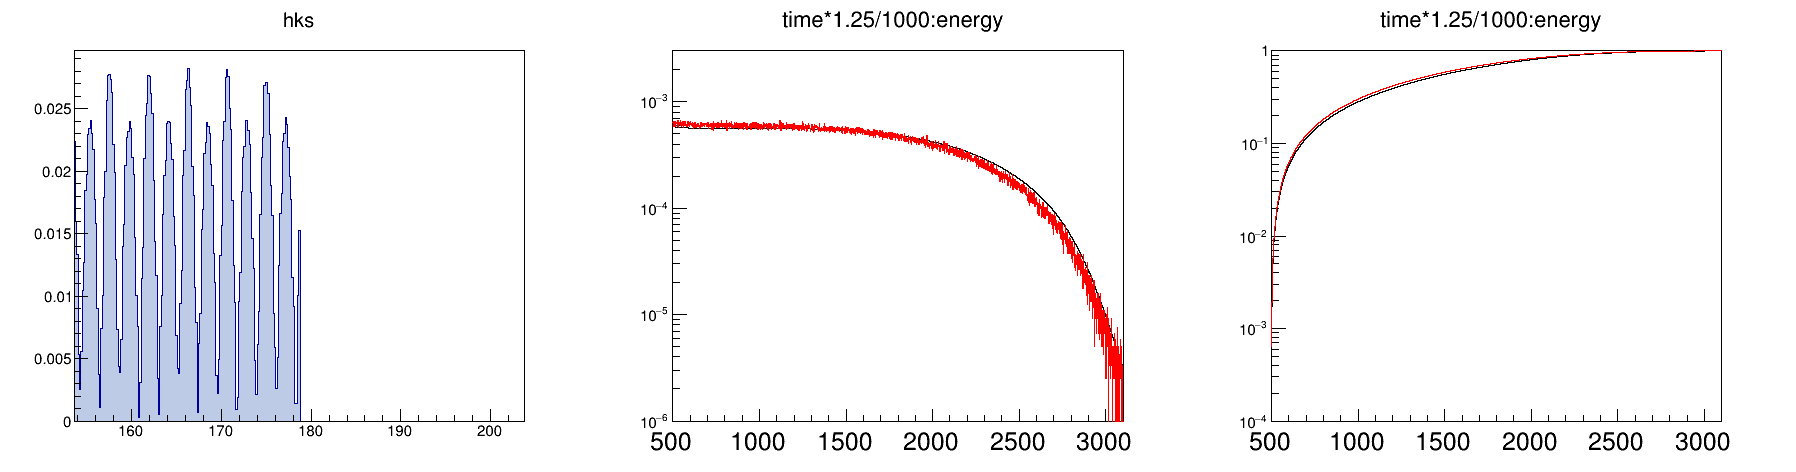

In [37]:
for div in range(1000):
    hprint = timeSlicesCum[div].Clone("hprint")
    c = r.TCanvas("c","c",1800,500)
    c.Divide(3)
    
    c.cd(1)   
    hks.SetBinContent(div,ks[div])
    hks.GetXaxis().SetRangeUser(times[div]-25, times[div]+25)
    hks.Draw("HIST")
    
    c.cd(2)
    h.Draw("HIST")
    h.GetYaxis().SetRangeUser(0.000001,.003)
    timeSlices[div].SetLineColor(2)
    timeSlices[div].Draw("HIST SAME")
    r.gPad.SetLogy()
    
    c.cd(3)
    hcum.Draw("HIST")
    hprint.SetLineColor(2)
    hprint.Draw("HIST SAME")
    hcum.GetYaxis().SetRangeUser(0.0001,1)
    r.gPad.SetLogy()
    
    c.Draw()
    c.Print("./images/evt_ks_vs_cum_"+str(div).zfill(5)+".png")